# Are point source fringes observed in different test campaign consistent?
We use the point source centroid information determined in Appendix A to compare the fringe transmission of point source observations taken in the FM, CV1RR, CV2, and CV3 MIRI ground test campaigns.

## > Import modules

In [1]:
import funcs
import mrsobs

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

## > Get data
We load the images for one band of the MRS for different point source positions, from different ground tests, including: 
* FM MRS-OPT-01    (MRS FOV and Distortion Measurements)
* FM MRS-OPT-02    (MRS Image Quality)
* FM MRS-OPT-06    (Across Slit Scans)
* CV1RR MRS-OPT-02 (MRS Image Quality)
* CV2 MRS-OPT-02   (MRS Image Quality)
* CV3 MRS-OPT-02   (MRS Image Quality)
  
We also load an MTS extended source observation (800K BB) to use as a reference.

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'notebooks/distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

# Get data
band = '1A'
FM_MRS_OPT_01_raster_centroid       = funcs.load_obj('FM_MRS_OPT_01_raster_centroid',path='obj/')
FM_MRS_OPT_02_centroid              = funcs.load_obj('FM_MRS_OPT_02_centroid',path='obj/')
FM_MRS_OPT_06_leftraster_centroid   = funcs.load_obj('FM_MRS_OPT_06_leftraster_centroid',path='obj/')
FM_MRS_OPT_06_middleraster_centroid = funcs.load_obj('FM_MRS_OPT_06_middleraster_centroid',path='obj/')
FM_MRS_OPT_06_rightraster_centroid  = funcs.load_obj('FM_MRS_OPT_06_rightraster_centroid',path='obj/')
# CV1RR_MRS_OPT_02_centroid           = funcs.load_obj('CV1RR_MRS_OPT_02_centroid',path='obj/')
CV2_MRS_OPT_02_centroid             = funcs.load_obj('CV2_MRS_OPT_02_centroid',path='obj/')
CV3_MRS_OPT_02_centroid             = funcs.load_obj('CV3_MRS_OPT_02_centroid',path='obj/')
ext_source_sci,ext_source_bkg       = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K')

# Get wavelength calibration pixel map
d2cMaps   = funcs.load_obj('d2cMaps_band{}_tr80pc'.format(band),path=d2cMapDir)
lambdaMap = d2cMaps['lambdaMap']
alphaMap = d2cMaps['alphaMap']
nslices   = d2cMaps['nslices']

# Get spectral resolution table
specres_table = funcs.get_cdps(band,cdpDir)[4]

In [3]:
# calibrate extended source observation
ext_source_bkgsubtr    = ext_source_sci-ext_source_bkg
ext_source_oddevencorr = funcs.OddEvenRowSignalCorrection(ext_source_bkgsubtr)

In [4]:
# Let's make a call function for the centroid data
def print_obs_in_square(alpha_min,alpha_max,beta_min,beta_max):
    for pointing in FM_MRS_OPT_01_raster_centroid.keys(): 
        alpha_pos,beta_pos = np.mean(FM_MRS_OPT_01_raster_centroid[pointing][1][~np.isnan(FM_MRS_OPT_01_raster_centroid[pointing][1])]),np.mean(FM_MRS_OPT_01_raster_centroid[pointing][2][~np.isnan(FM_MRS_OPT_01_raster_centroid[pointing][2])])
        if (alpha_max>alpha_pos>alpha_min) & (beta_max>beta_pos>beta_min): 
            print r'FM_MRS_OPT_01: {}, alpha={} arcsec, beta={} arcsec'.format(pointing,round(alpha_pos,3),round(beta_pos,3) )
    for pointing in FM_MRS_OPT_02_centroid.keys():
        alpha_pos,beta_pos = np.mean(FM_MRS_OPT_02_centroid[pointing][1][~np.isnan(FM_MRS_OPT_02_centroid[pointing][1])]),np.mean(FM_MRS_OPT_02_centroid[pointing][2][~np.isnan(FM_MRS_OPT_02_centroid[pointing][2])])
        if (alpha_max>alpha_pos>alpha_min) & (beta_max>beta_pos>beta_min): 
            print r'FM_MRS_OPT_02: {}, alpha={} arcsec, beta={} arcsec'.format(pointing,round(alpha_pos,3),round(beta_pos,3) )
    for pointing in FM_MRS_OPT_06_leftraster_centroid.keys():
        alpha_pos,beta_pos = np.mean(FM_MRS_OPT_06_leftraster_centroid[pointing][1][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[pointing][1])]),np.mean(FM_MRS_OPT_06_leftraster_centroid[pointing][2][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[pointing][2])])
        if (alpha_max>alpha_pos>alpha_min) & (beta_max>beta_pos>beta_min): 
            print r'FM_MRS_OPT_06 left: {}, alpha={} arcsec, beta={} arcsec'.format(pointing,round(alpha_pos,3),round(beta_pos,3) )
    for pointing in FM_MRS_OPT_06_middleraster_centroid.keys(): 
        alpha_pos,beta_pos = np.mean(FM_MRS_OPT_06_middleraster_centroid[pointing][1][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[pointing][1])]),np.mean(FM_MRS_OPT_06_middleraster_centroid[pointing][2][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[pointing][2])])
        if (alpha_max>alpha_pos>alpha_min) & (beta_max>beta_pos>beta_min): 
            print r'FM_MRS_OPT_06 middle: {}, alpha={} arcsec, beta={} arcsec'.format(pointing,round(alpha_pos,3),round(beta_pos,3) )
    for pointing in FM_MRS_OPT_06_rightraster_centroid.keys():
        alpha_pos,beta_pos = np.mean(FM_MRS_OPT_06_rightraster_centroid[pointing][1][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[pointing][1])]),np.mean(FM_MRS_OPT_06_rightraster_centroid[pointing][2][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[pointing][2])])
        if (alpha_max>alpha_pos>alpha_min) & (beta_max>beta_pos>beta_min): 
            print r'FM_MRS_OPT_06 right: {}, alpha={} arcsec, beta={} arcsec'.format(pointing,round(alpha_pos,3),round(beta_pos,3) )
#     for pointing in CV1RR_MRS_OPT_02_centroid.keys():
#         alpha_pos,beta_pos = np.mean(CV1RR_MRS_OPT_02_centroid[pointing][1][~np.isnan(CV1RR_MRS_OPT_02_centroid[pointing][1])]),np.mean(CV1RR_MRS_OPT_02_centroid[pointing][2][~np.isnan(CV1RR_MRS_OPT_02_centroid[pointing][2])])
#         if (alpha_max>alpha_pos>alpha_min) & (beta_max>beta_pos>beta_min): 
#         print r'CV1RR_MRS_OPT_02: {}, $\alpha$={} arcsec,$\beta$={} arcsec'.format(pointing,round(alpha_pos,3),round(beta_pos,) )
    for pointing in CV2_MRS_OPT_02_centroid.keys(): 
        alpha_pos,beta_pos = np.mean(CV2_MRS_OPT_02_centroid[pointing][1][~np.isnan(CV2_MRS_OPT_02_centroid[pointing][1])]),np.mean(CV2_MRS_OPT_02_centroid[pointing][2][~np.isnan(CV2_MRS_OPT_02_centroid[pointing][2])])
        if (alpha_max>alpha_pos>alpha_min) & (beta_max>beta_pos>beta_min): 
            print r'CV2_MRS_OPT_02: {}, alpha={} arcsec, beta={} arcsec'.format(pointing,round(alpha_pos,3),round(beta_pos,3) )
    for pointing in CV3_MRS_OPT_02_centroid.keys():
        alpha_pos,beta_pos = np.mean(CV3_MRS_OPT_02_centroid[pointing][1][~np.isnan(CV3_MRS_OPT_02_centroid[pointing][1])]),np.mean(CV3_MRS_OPT_02_centroid[pointing][2][~np.isnan(CV3_MRS_OPT_02_centroid[pointing][2])])
        if (alpha_max>alpha_pos>alpha_min) & (beta_max>beta_pos>beta_min):
            print r'CV3_MRS_OPT_02: {}, alpha={} arcsec, beta={} arcsec'.format(pointing,round(alpha_pos,3),round(beta_pos,3) )

<IPython.core.display.Javascript object>


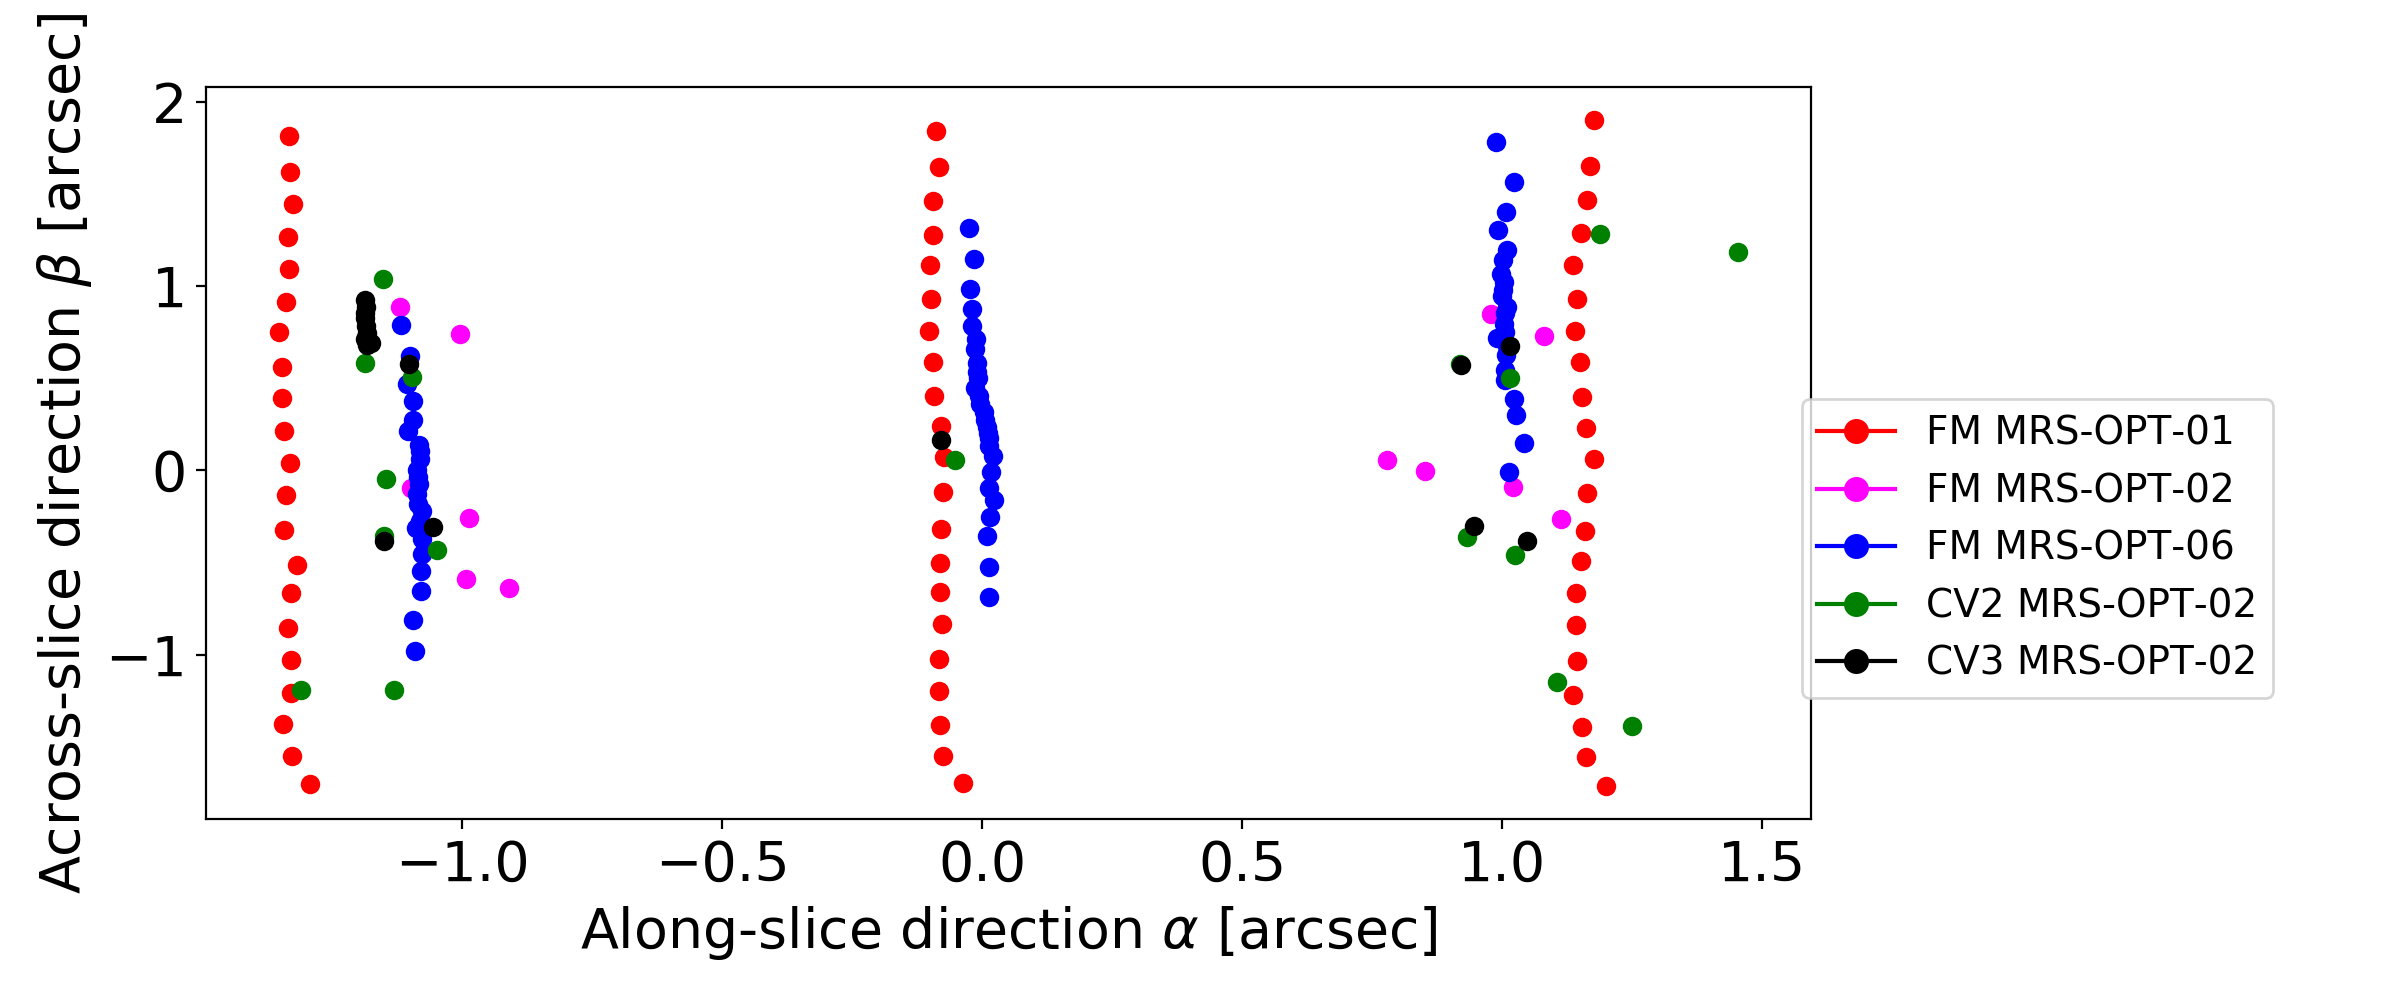

FM_MRS_OPT_06 middle: P8, alpha=0.021 arcsec, beta=0.076 arcsec
CV2_MRS_OPT_02: P0, alpha=-0.053 arcsec, beta=0.058 arcsec


In [5]:
plt.figure(figsize=(12,5))
for pointing in FM_MRS_OPT_01_raster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_01_raster_centroid[key][1][~np.isnan(FM_MRS_OPT_01_raster_centroid[key][1])]),np.mean(FM_MRS_OPT_01_raster_centroid[key][2][~np.isnan(FM_MRS_OPT_01_raster_centroid[key][2])]),'ro')
for pointing in FM_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_02_centroid[key][1][~np.isnan(FM_MRS_OPT_02_centroid[key][1])]),np.mean(FM_MRS_OPT_02_centroid[key][2][~np.isnan(FM_MRS_OPT_02_centroid[key][2])]),'o',color='magenta')
for pointing in FM_MRS_OPT_06_leftraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_leftraster_centroid[key][1][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[key][1])]),np.mean(FM_MRS_OPT_06_leftraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_leftraster_centroid[key][2])]),'bo')
for pointing in FM_MRS_OPT_06_middleraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_middleraster_centroid[key][1][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[key][1])]),np.mean(FM_MRS_OPT_06_middleraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_middleraster_centroid[key][2])]),'bo')
for pointing in FM_MRS_OPT_06_rightraster_centroid.keys():
    key = pointing
    plt.plot(np.mean(FM_MRS_OPT_06_rightraster_centroid[key][1][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[key][1])]),np.mean(FM_MRS_OPT_06_rightraster_centroid[key][2][~np.isnan(FM_MRS_OPT_06_rightraster_centroid[key][2])]),'bo')
# # for pointing in CV1RR_MRS_OPT_02_centroid.keys():
# #     key = pointing
# #     plt.plot(np.mean(CV1RR_MRS_OPT_02_centroid[key][1][~np.isnan(CV1RR_MRS_OPT_02_centroid[key][1])]),CV1RR_MRS_OPT_02_centroid[key][0],'o',color='orange')
for pointing in CV2_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV2_MRS_OPT_02_centroid[key][1][~np.isnan(CV2_MRS_OPT_02_centroid[key][1])]),np.mean(CV2_MRS_OPT_02_centroid[key][2][~np.isnan(CV2_MRS_OPT_02_centroid[key][2])]),'go')
for pointing in CV3_MRS_OPT_02_centroid.keys():
    key = pointing
    plt.plot(np.mean(CV3_MRS_OPT_02_centroid[key][1][~np.isnan(CV3_MRS_OPT_02_centroid[key][1])]),np.mean(CV3_MRS_OPT_02_centroid[key][2][~np.isnan(CV3_MRS_OPT_02_centroid[key][2])]),'ko')
plt.xlabel(r'Along-slice direction $\alpha$ [arcsec]')
plt.ylabel(r'Across-slice direction $\beta$ [arcsec]')
legend_elements = [Line2D([0],[0],marker='o',color='r',label='FM MRS-OPT-01',markerfacecolor='r',markersize=8),
                   Line2D([0],[0],marker='o',color='magenta',label='FM MRS-OPT-02',markerfacecolor='magenta',markersize=8),
                   Line2D([0],[0],marker='o',color='b',label='FM MRS-OPT-06',markerfacecolor='b',markersize=8),
                   Line2D([0],[0],marker='o',color='g',label='CV2 MRS-OPT-02',markerfacecolor='g',markersize=8),
                   Line2D([0],[0],marker='o',color='k',label='CV3 MRS-OPT-02',markerfacecolor='k',markersize=8)]
plt.legend(handles=legend_elements,bbox_to_anchor=(1.3,0.6))
plt.tight_layout(rect=[0,0,0.77,1])

# print_obs_in_square(-0.085,-0.045,0.027,0.19)
# print_obs_in_square(-1.106,-1.098,0.5,0.65)
# print_obs_in_square(1,1.02,0.48,0.51)
print_obs_in_square(-0.059,0.037,0.04,0.088)

### Remarks:
* There are several regions with point source observations from different test campaigns. Let's pick out a few of them and see how the fringe transmissions at the selected locations compare.

### > Test 1: CV2 vs CV3
In slice 9 we find three regions of similar locale for point source observations in test campaign CV2 and CV3. We perform here an inter and an intra-comparison of their fringe transmissions.

In [7]:
#  Normalize signal from first couple of nearby observations
CV2_P1_norm_fringe = funcs.norm_fringe(CV2_MRS_OPT_02_centroid['P1'][0],min_dist=2,k=1)
CV3_Q7_norm_fringe = funcs.norm_fringe(CV3_MRS_OPT_02_centroid['Q7'][0],min_dist=2,k=1)
# # second set
# CV2_P2_norm_fringe = funcs.norm_fringe(CV2_MRS_OPT_02_centroid['P2'][0],min_dist=2,k=1)
# CV3_Q6_norm_fringe = funcs.norm_fringe(CV3_MRS_OPT_02_centroid['Q6'][0],min_dist=2,k=1)
# # third set
# CV2_P7_norm_fringe = funcs.norm_fringe(CV2_MRS_OPT_02_centroid['P7'][0],min_dist=2,k=1)
# CV3_Q2_norm_fringe = funcs.norm_fringe(CV3_MRS_OPT_02_centroid['Q2'][0],min_dist=2,k=1)
# # fourth set
# FM_P7_norm_fringe  = funcs.norm_fringe(FM_MRS_OPT_01_raster_centroid['P7'][0],min_dist=2,k=1)
# CV2_P9_norm_fringe = funcs.norm_fringe(CV2_MRS_OPT_02_centroid['P9'][0],min_dist=2,k=1)
# # fifth set
# FM_P29_norm_fringe  = funcs.norm_fringe(FM_MRS_OPT_01_raster_centroid['P29'][0],min_dist=2,k=1)
# CV2_P0_norm_fringe = funcs.norm_fringe(CV2_MRS_OPT_02_centroid['P0'][0],min_dist=2,k=1)
# # sixth set
# FM_P32_norm_fringe  = funcs.norm_fringe(FM_MRS_OPT_01_raster_centroid['P32'][0],min_dist=2,k=1)
# CV2_P0_norm_fringe = funcs.norm_fringe(CV2_MRS_OPT_02_centroid['P0'][0],min_dist=2,k=1)
# CV3_Q0_norm_fringe = funcs.norm_fringe(CV3_MRS_OPT_02_centroid['Q0'][0],min_dist=2,k=1)
# # seventh set
# FM_P22_norm_fringe = funcs.norm_fringe(FM_MRS_OPT_06_leftraster_centroid['P22'][0],min_dist=2,k=1)
# CV3_Q4_norm_fringe = funcs.norm_fringe(CV3_MRS_OPT_02_centroid['Q4'][0],min_dist=2,k=1)
# # eighth set
# FM_P5_norm_fringe = funcs.norm_fringe(FM_MRS_OPT_06_rightraster_centroid['P5'][0],min_dist=2,k=1)
# CV2_P4_norm_fringe = funcs.norm_fringe(CV2_MRS_OPT_02_centroid['P4'][0],min_dist=2,k=1)
# # ninth set
# FM_P8_norm_fringe  = funcs.norm_fringe(FM_MRS_OPT_06_middleraster_centroid['P8'][0],min_dist=2,k=1)
# CV2_P0_norm_fringe = funcs.norm_fringe(CV2_MRS_OPT_02_centroid['P0'][0],min_dist=2,k=1)

<IPython.core.display.Javascript object>


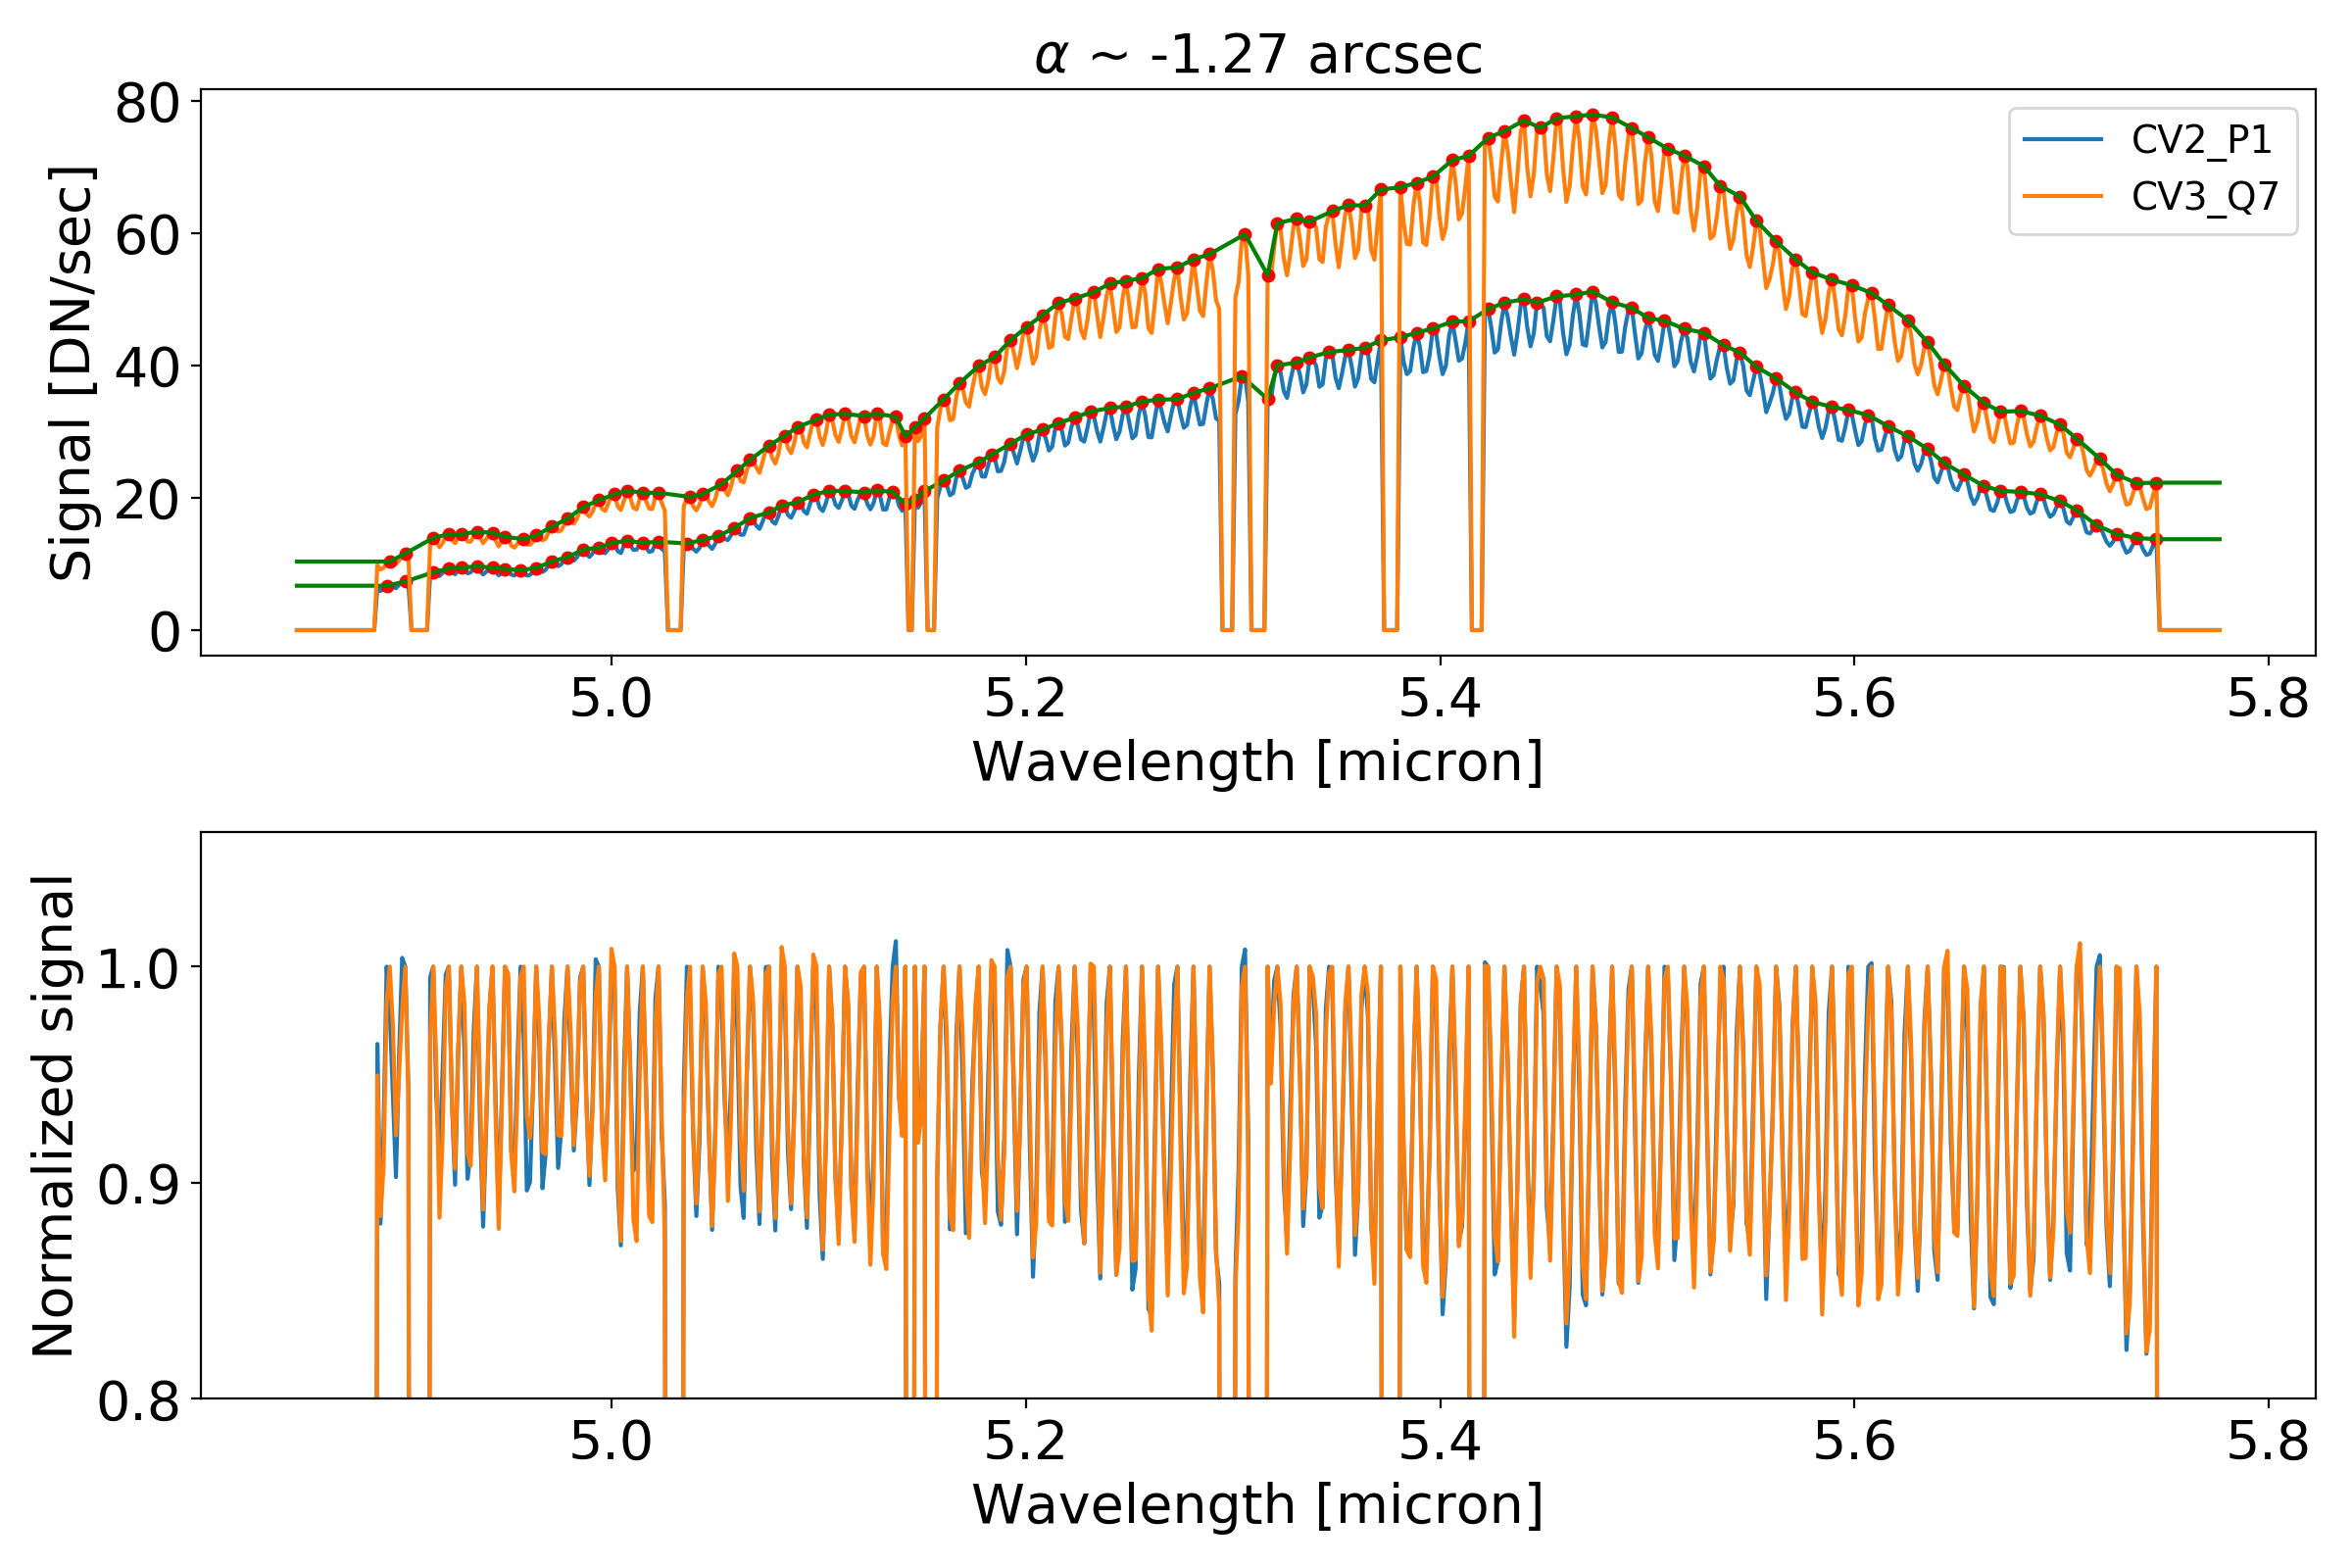

<IPython.core.display.Javascript object>


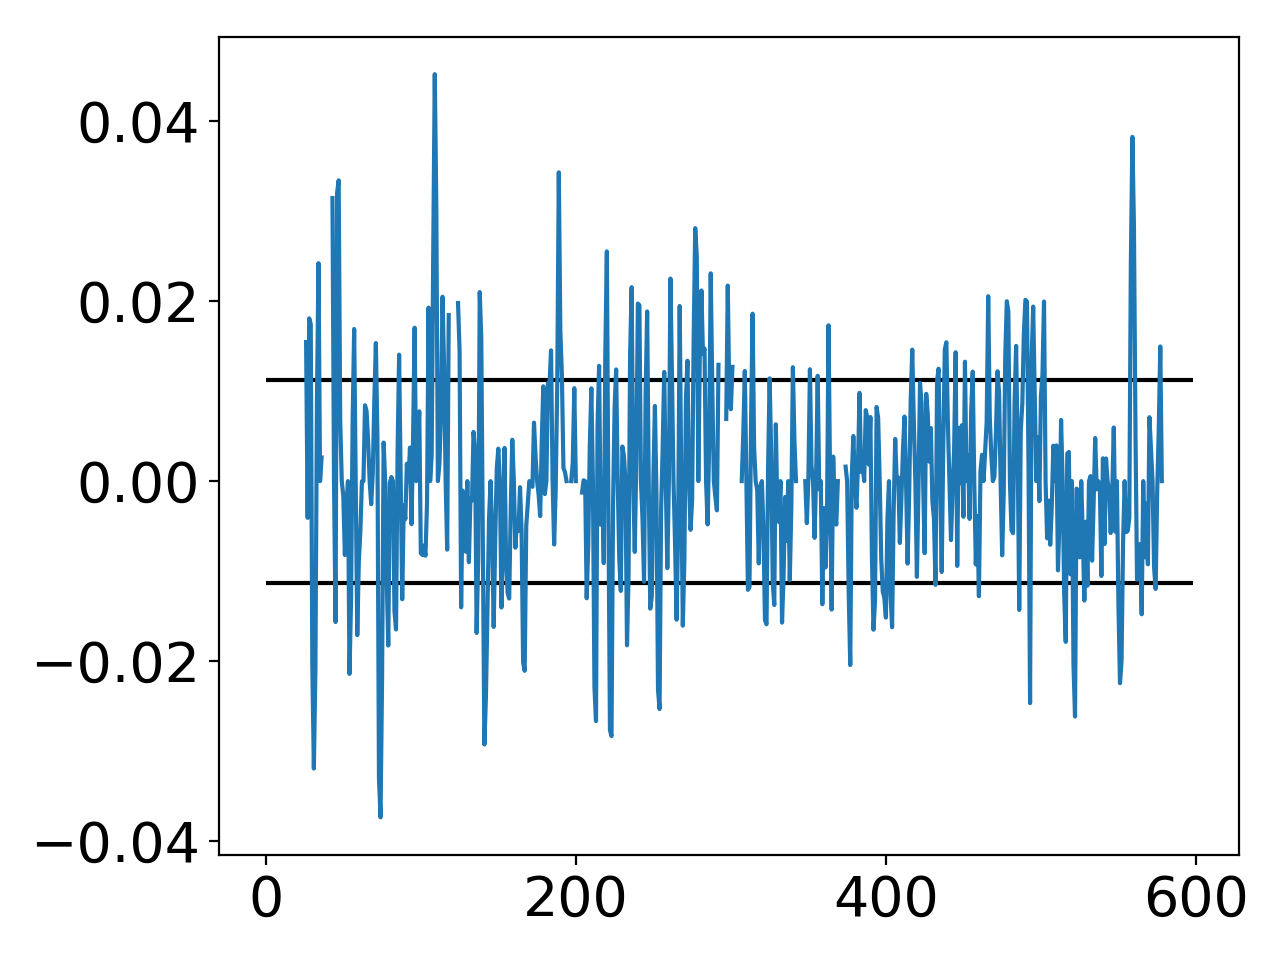

0.01128545985580299


In [8]:
# let's look at the CV2/CV3 intercomparison
first_data_array_id = 'CV2_P1'
second_data_array_id = 'CV3_Q7'
first_data_array = CV2_P1_norm_fringe
second_data_array = CV3_Q7_norm_fringe

fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].set_title(r'$\alpha$ ~ -1.27 arcsec')
axs[0].plot(lambcens,first_data_array[0],label=first_data_array_id)
axs[0].plot(lambcens[first_data_array[1]],first_data_array[0][first_data_array[1]],'ro',markersize=4)
axs[0].plot(lambcens,first_data_array[2],'g')
axs[0].plot(lambcens,second_data_array[0],label=second_data_array_id)
axs[0].plot(lambcens[second_data_array[1]],second_data_array[0][second_data_array[1]],'ro',markersize=4)
axs[0].plot(lambcens,second_data_array[2],'g')
axs[0].set_ylabel('Signal [DN/sec]')
axs[0].legend(loc='upper right')
axs[1].plot(lambcens,first_data_array[0]/first_data_array[2])
axs[1].plot(lambcens,second_data_array[0]/second_data_array[2])
axs[1].set_ylabel('Normalized signal')
axs[1].set_ylim(0.8)
for plot in range(2): axs[plot].set_xlabel('Wavelength [micron]')
plt.tight_layout()

test = (first_data_array[0]/first_data_array[2])/(second_data_array[0]/second_data_array[2]) - 1
sel = ~np.isnan(test)
standard_deviation = np.std(test[sel])
plt.figure()
plt.plot(test)
plt.hlines([-standard_deviation,standard_deviation],0,len(test))
plt.tight_layout()

print standard_deviation


In [5]:
# Let's construct the spectral grid for the specified MRS band
lambcens,lambfwhms = funcs.spectral_gridding(band,d2cMaps,specres_table=specres_table,oversampling=2)

In [6]:
# CV2 MRS_OPT_02
from astropy.io import fits
lvl2path  = workDir+'CV2_data/LVL2/'
pointing  = 'CV2_P1'
CV2_pointings_dict = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2')
point_source_sci,point_source_bkg = fits.open(lvl2path+CV2_pointings_dict[pointing][1])[0].data[0,:,:],fits.open(lvl2path+CV2_pointings_dict[pointing][3])[0].data[0,:,:]
point_source_bkgsubtr = point_source_sci-point_source_bkg
point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

CV2_P1_centroid = funcs.point_source_centroiding(band,point_source_oddevencorr,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='1D')

STEP 1: Rough centroiding
Slice 9 has the largest summed flux
Source position: beta = -0.35arcsec, alpha = -1.16arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193]



In [7]:
# CV3 MRS_OPT_02
lvl2path  = workDir+'CV3_data/LVL2/'
pointing  = 'CV3_Q7'
CV3_pointings_dict = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV3')
point_source_sci,point_source_bkg = fits.open(lvl2path+CV3_pointings_dict[pointing][1])[0].data[0,:,:],fits.open(lvl2path+CV3_pointings_dict[pointing][3])[0].data[0,:,:]
point_source_bkgsubtr = point_source_sci-point_source_bkg
point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

CV3_Q7_centroid = funcs.point_source_centroiding(band,point_source_oddevencorr,d2cMaps,spec_grid=[lambcens,lambfwhms],fit='1D')

STEP 1: Rough centroiding
Slice 9 has the largest summed flux
Source position: beta = -0.35arcsec, alpha = -1.16arcsec 

STEP 2: 1D Gaussian fit
[Along-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193]
[Across-slice fit] The following bins failed to converge:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193]



<IPython.core.display.Javascript object>


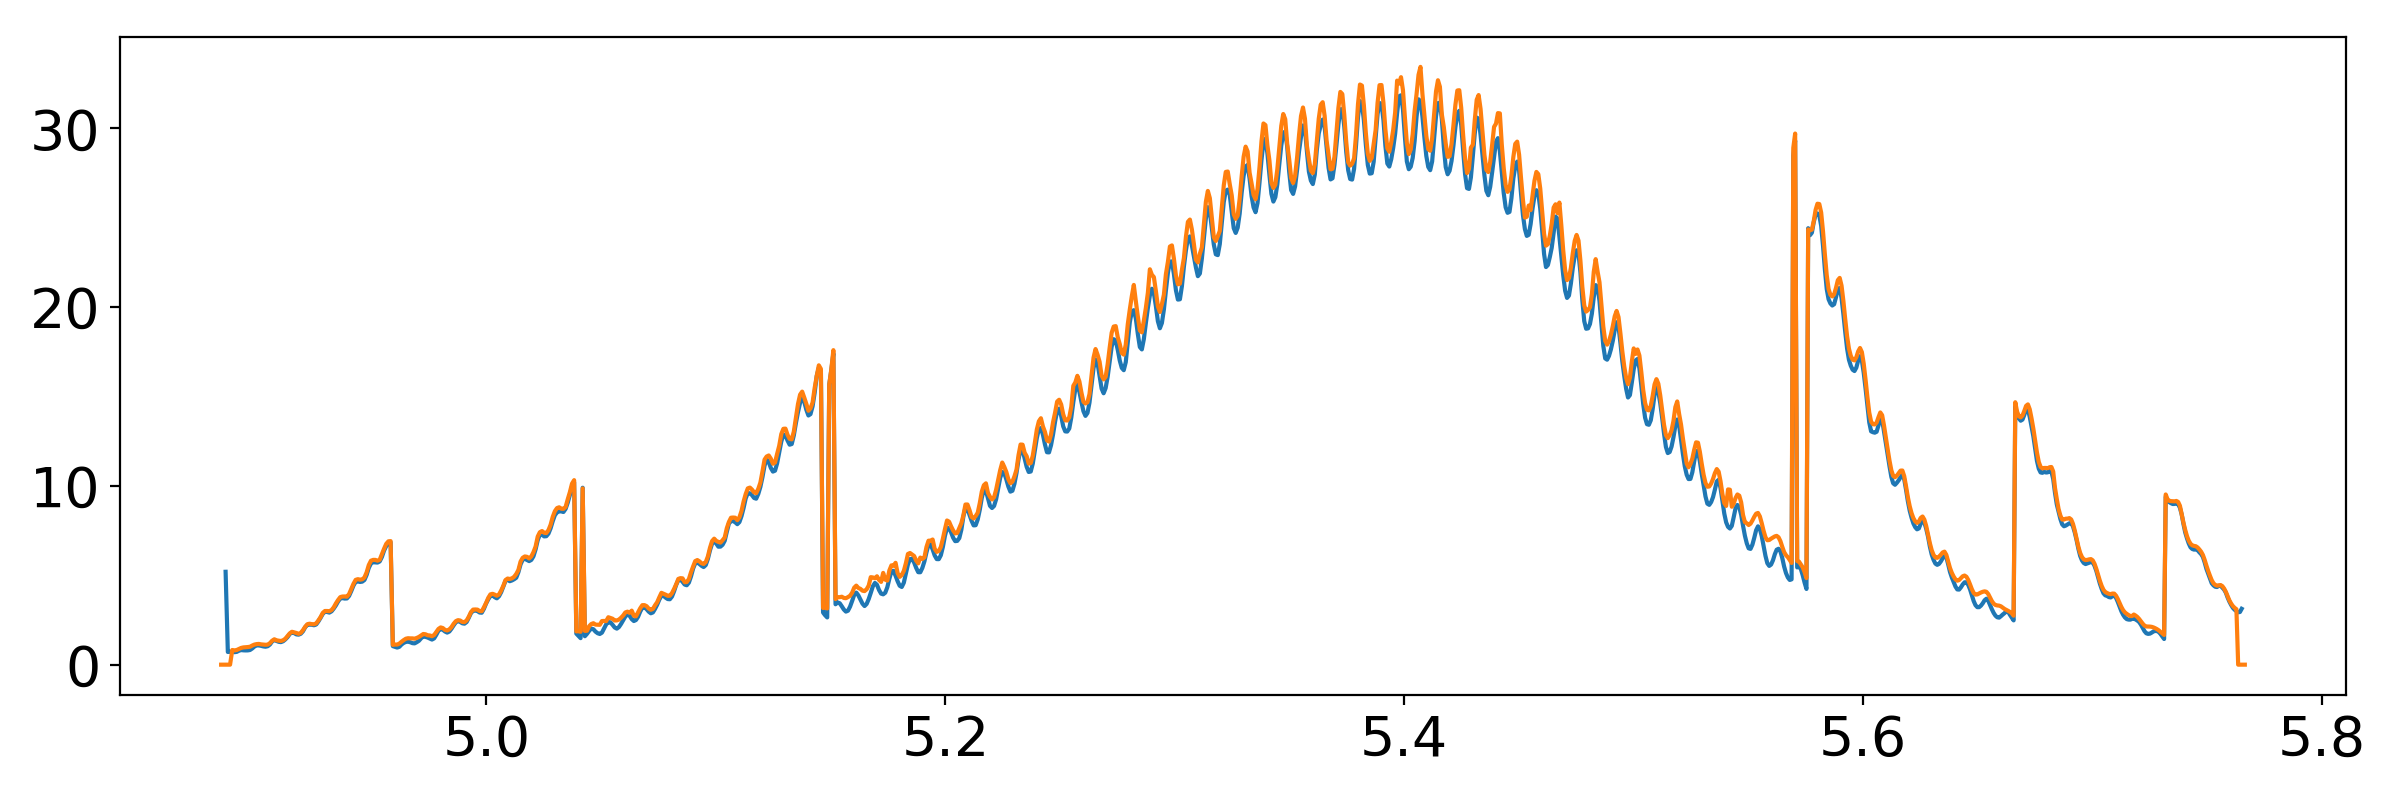

<IPython.core.display.Javascript object>


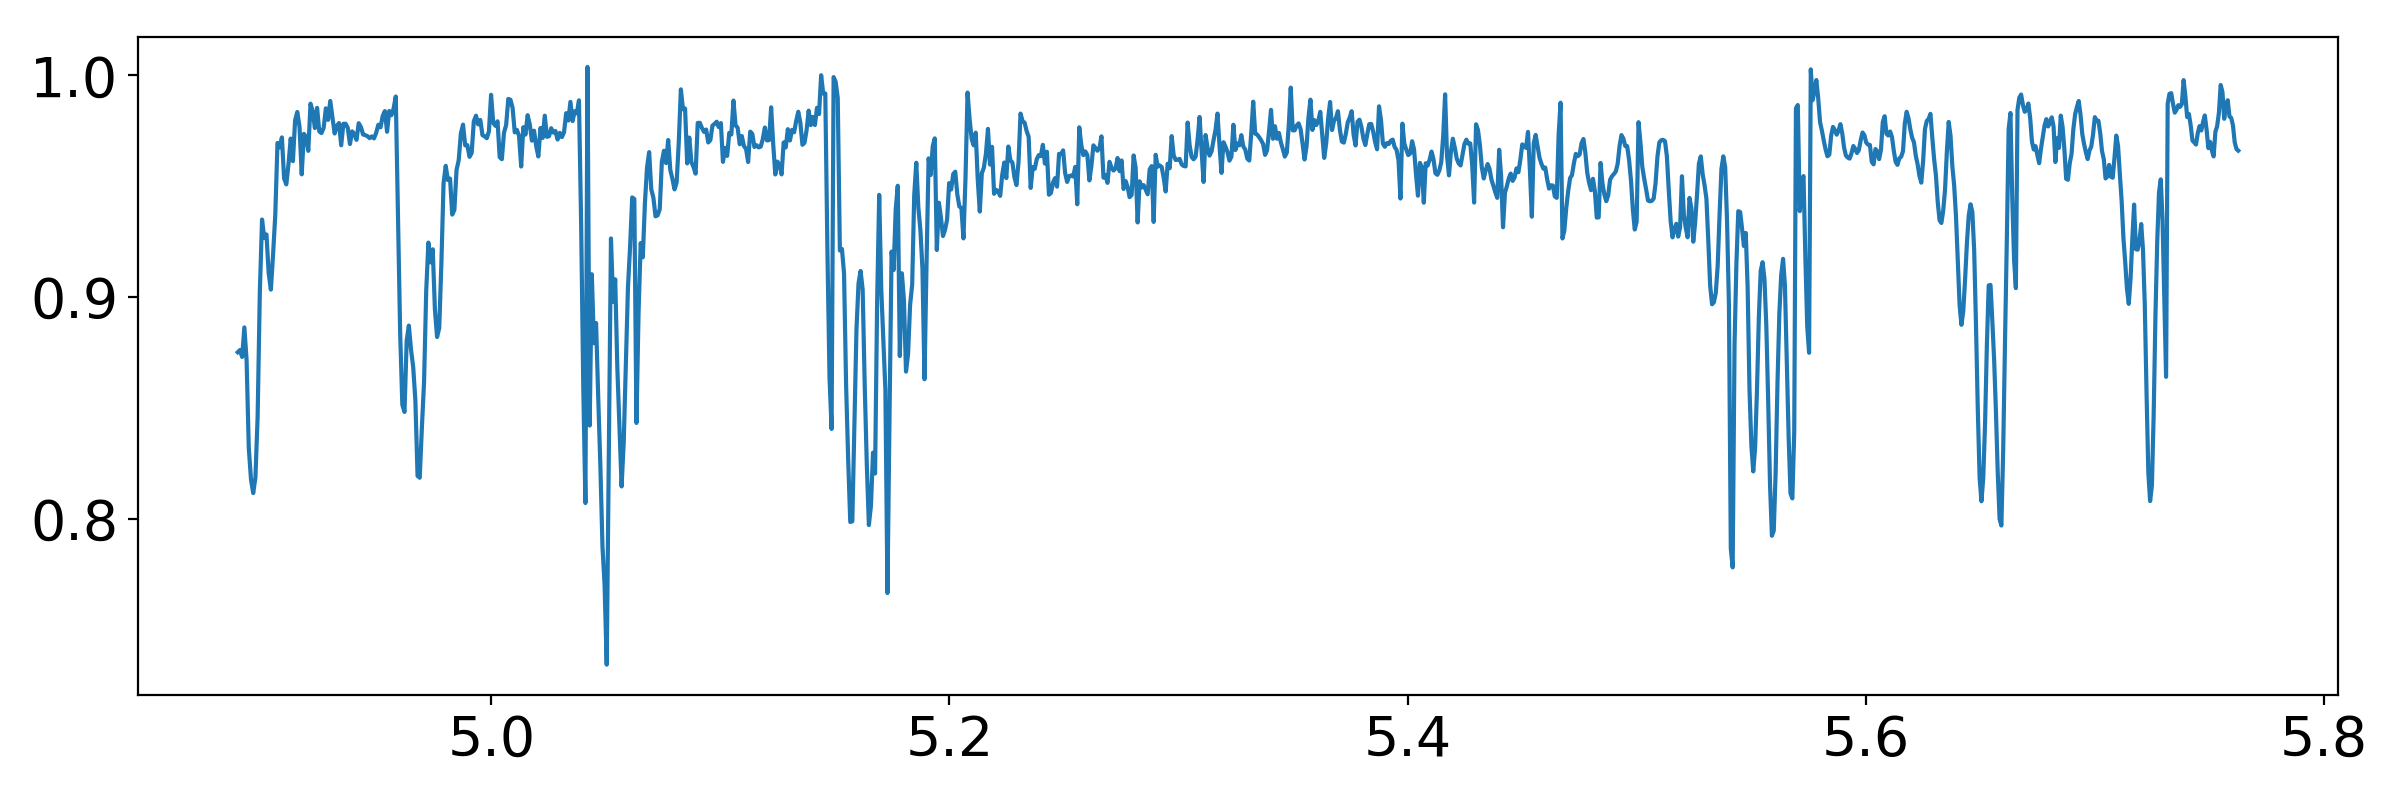

In [52]:
interp_signals = interp1d(lambcens,CV2_P1_centroid[0])
interp_alphas = interp1d(lambcens,CV2_P1_centroid[1])
interp_sigma_alpha = interp1d(lambcens,CV2_P1_centroid[3])
interp_bkg = interp1d(lambcens,CV2_P1_centroid[5])

ypos_p,xpos_p   = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps)
xpos_p +=1

alphas_det = d2cMaps['alphaMap'][ypos_p,xpos_p]
gaussian_value = np.zeros(len(ypos_p))
for i in range(5,len(ypos_p)-5):
    lamb = d2cMaps['lambdaMap'][ypos_p[i],xpos_p[i]]
    popt = [interp_signals(lamb),interp_alphas(lamb),interp_sigma_alpha(lamb),interp_bkg(lamb)]
    gaussian_value[i] = funcs.gauss1d_wBaseline(alphas_det[i],*popt)
    
sel = d2cMaps['lambdaMap'][ypos_p,xpos_p]!=0
plt.figure(figsize=(12,4))
plt.plot(d2cMaps['lambdaMap'][ypos_p,xpos_p][sel],point_source_oddevencorr[ypos_p,xpos_p][sel])
plt.plot(d2cMaps['lambdaMap'][ypos_p,xpos_p][sel],gaussian_value[sel])
plt.tight_layout()

plt.figure(figsize=(12,4))
plt.plot(d2cMaps['lambdaMap'][ypos_p,xpos_p][sel],point_source_oddevencorr[ypos_p,xpos_p][sel]/gaussian_value[sel])
plt.tight_layout()

In [51]:
#-- point source
lvl2path  = workDir+'CV2_data/LVL2/'
pointing = 'CV2_P1'
CV2_pointings_dict = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2')
point_source_sci,point_source_bkg = fits.open(lvl2path+CV2_pointings_dict[pointing][1])[0].data[0,:,:],fits.open(lvl2path+CV2_pointings_dict[pointing][3])[0].data[0,:,:]
point_source_bkgsubtr = point_source_sci-point_source_bkg
point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

ypos_p,xpos_p   = funcs.detpixel_trace_compactsource(point_source_oddevencorr,band,d2cMaps)

plt.figure(figsize=(12,4))
plt.plot(lambcens,CV2_P1_centroid[0])
plt.plot(d2cMaps['lambdaMap'][ypos_p,xpos_p],point_source_oddevencorr[ypos_p,xpos_p])
plt.plot(d2cMaps['lambdaMap'][ypos_p,xpos_p],point_source_oddevencorr[ypos_p,xpos_p]/interp_fringes)
plt.plot(lambcens,CV3_Q7_centroid[0])
plt.tight_layout()

<IPython.core.display.Javascript object>


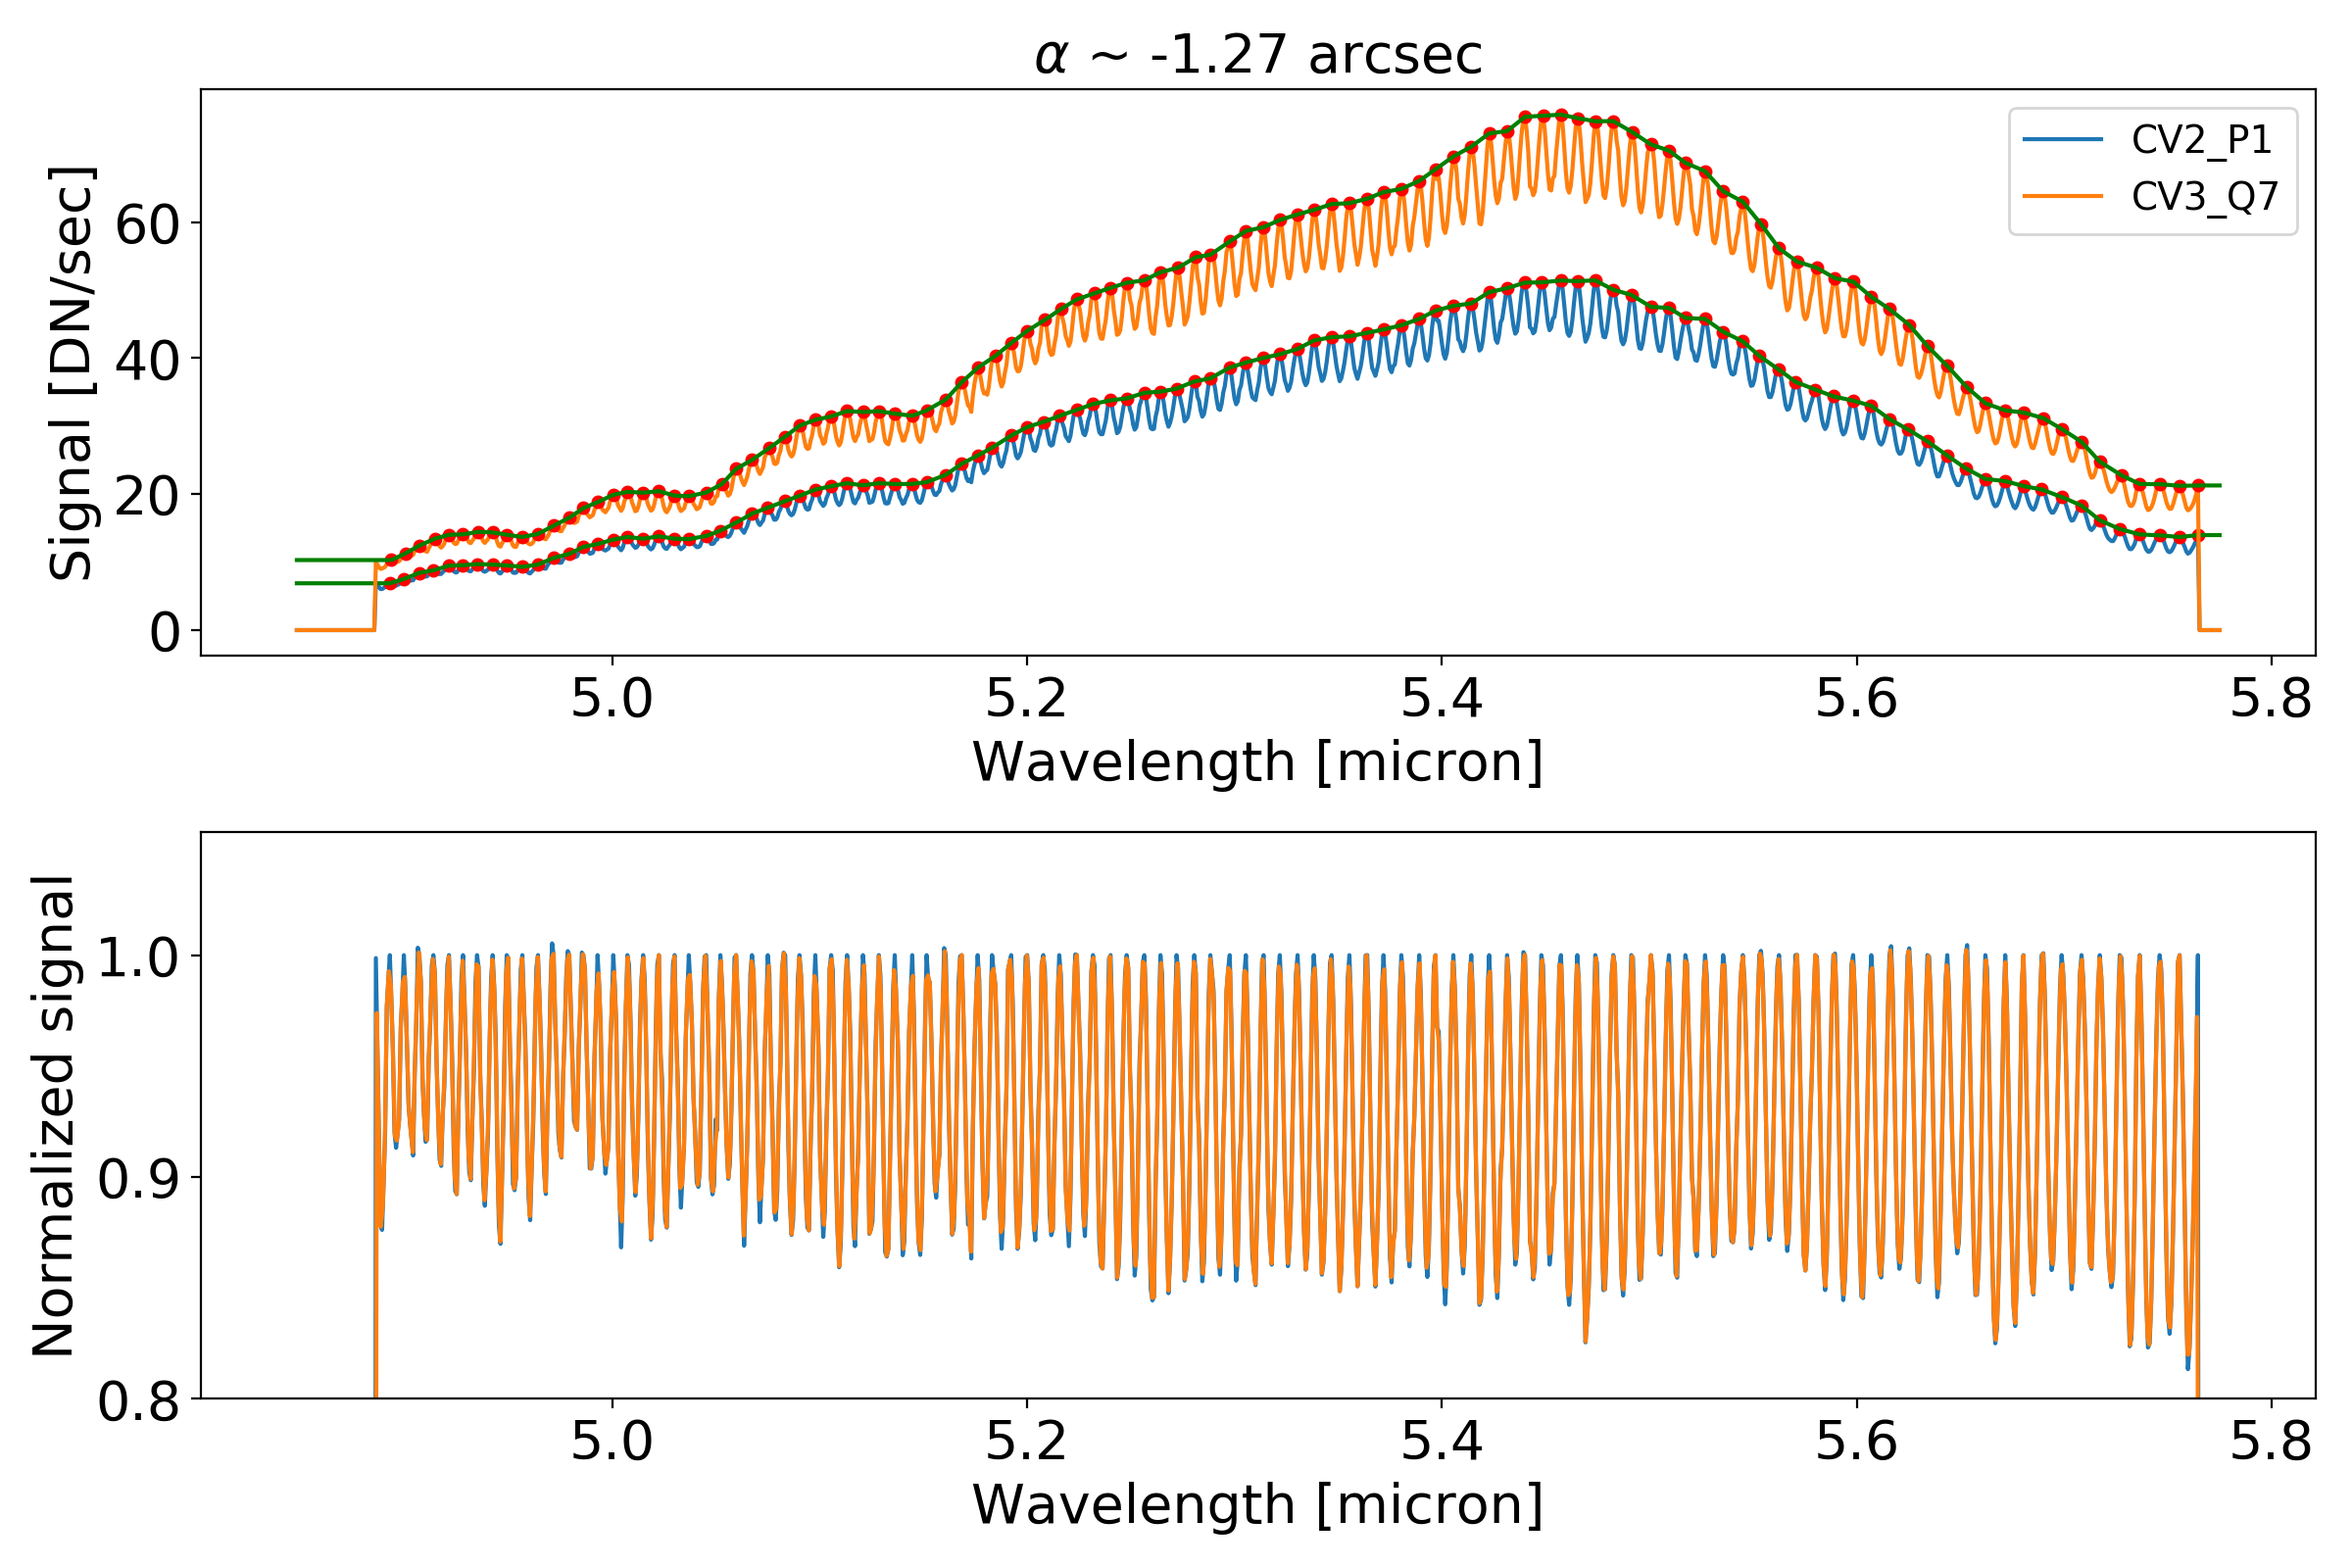

<IPython.core.display.Javascript object>


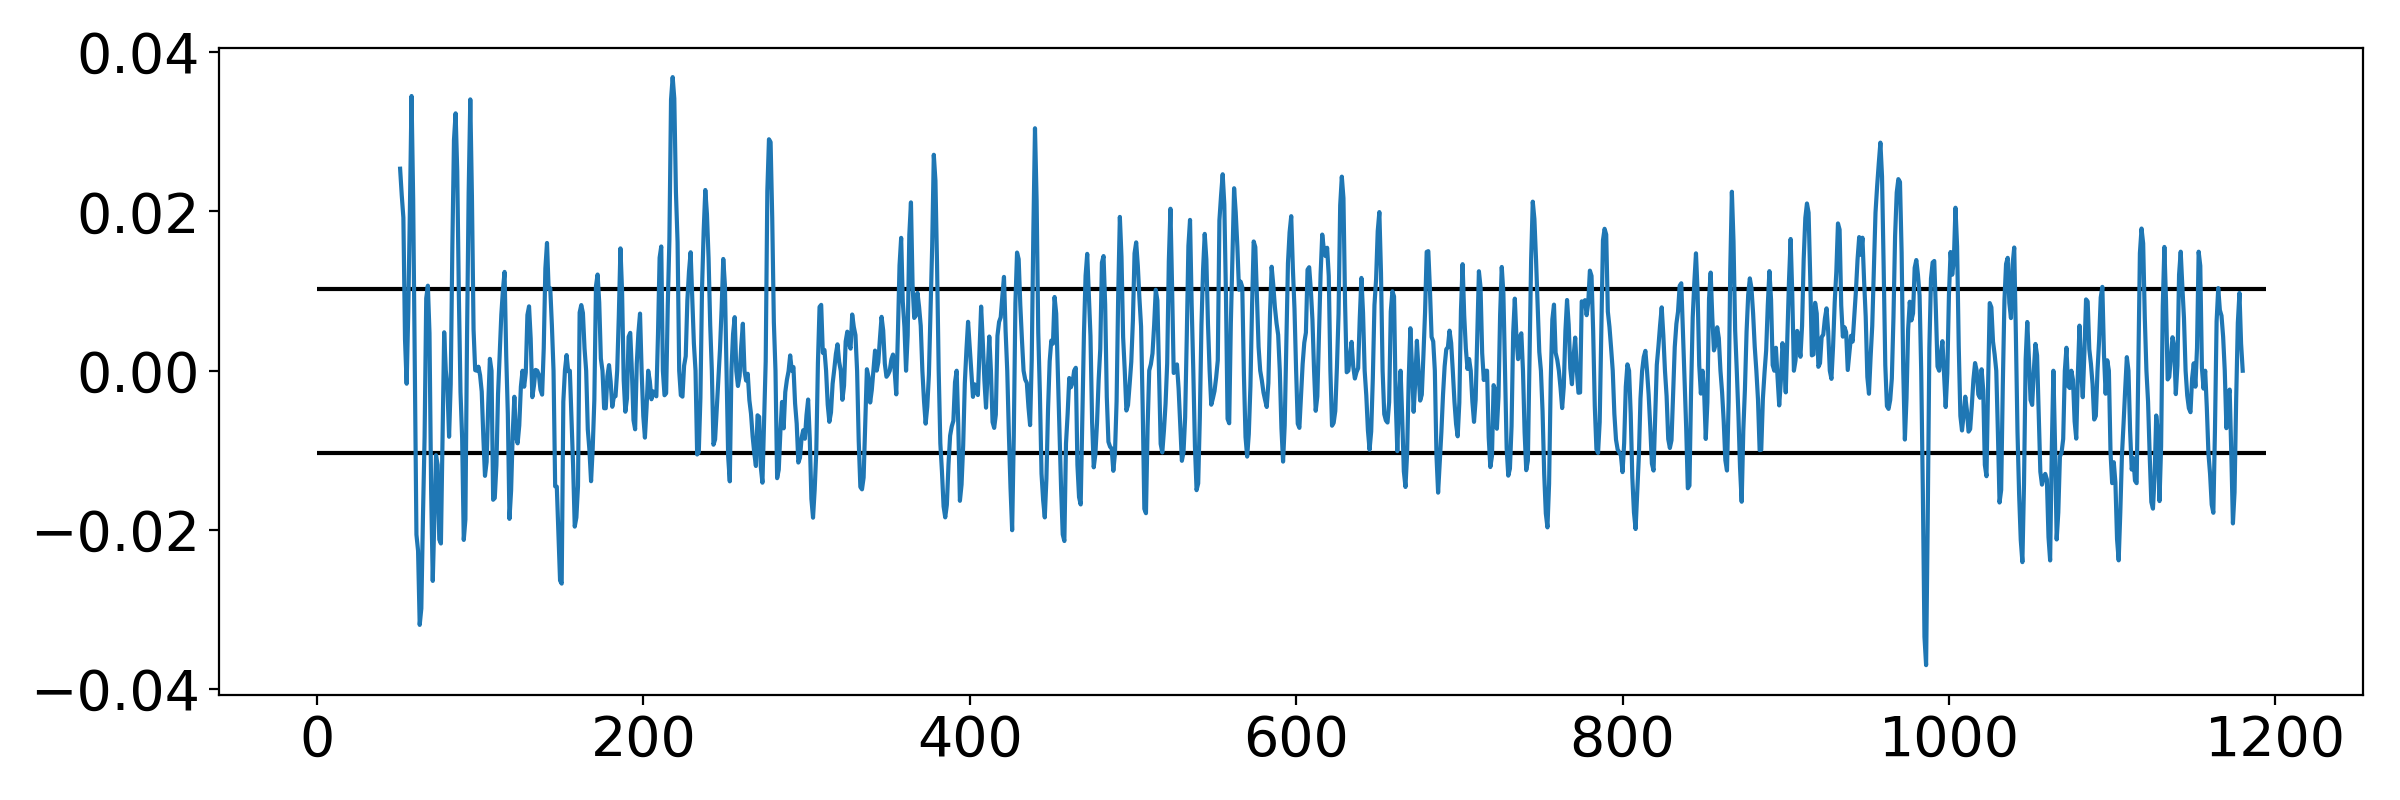

0.010314240154523325


In [19]:
# let's look at the CV2/CV3 intercomparison
CV2_P1_norm_fringe = funcs.norm_fringe(CV2_P1_centroid[0],min_dist=8,k=1)
CV3_Q7_norm_fringe = funcs.norm_fringe(CV3_Q7_centroid[0],min_dist=8,k=1)

first_data_array_id = 'CV2_P1'
second_data_array_id = 'CV3_Q7'
first_data_array = CV2_P1_norm_fringe
second_data_array = CV3_Q7_norm_fringe

from scipy.interpolate import interp1d
interp_fringes = interp1d(lambcens,CV2_P1_norm_fringe[0]/CV2_P1_norm_fringe[2])(d2cMaps['lambdaMap'][ypos_p,xpos_p])

fig,axs = plt.subplots(2,1,figsize=(12,8))
axs[0].set_title(r'$\alpha$ ~ -1.27 arcsec')
axs[0].plot(lambcens,first_data_array[0],label=first_data_array_id)
axs[0].plot(lambcens[first_data_array[1]],first_data_array[0][first_data_array[1]],'ro',markersize=4)
axs[0].plot(lambcens,first_data_array[2],'g')
axs[0].plot(lambcens,second_data_array[0],label=second_data_array_id)
axs[0].plot(lambcens[second_data_array[1]],second_data_array[0][second_data_array[1]],'ro',markersize=4)
axs[0].plot(lambcens,second_data_array[2],'g')
axs[0].set_ylabel('Signal [DN/sec]')
axs[0].legend(loc='upper right')
axs[1].plot(lambcens,first_data_array[0]/first_data_array[2])
axs[1].plot(d2cMaps['lambdaMap'][ypos_p,xpos_p],interp_fringes)
# axs[1].plot(lambcens,second_data_array[0]/second_data_array[2])
axs[1].set_ylabel('Normalized signal')
axs[1].set_ylim(0.8)
for plot in range(2): axs[plot].set_xlabel('Wavelength [micron]')
plt.tight_layout()

test = (first_data_array[0]/first_data_array[2])/(second_data_array[0]/second_data_array[2]) - 1
sel = ~np.isnan(test)
standard_deviation = np.std(test[sel])
plt.figure(figsize=(12,4))
plt.plot(test)
plt.hlines([-standard_deviation,standard_deviation],0,len(test))
plt.tight_layout()

print standard_deviation



### Remarks:
* The fringe transmission of the same point source performed in the CV2 test campaign and the CV3 test campaign agree to the 4% p2p level. Note that some uncertainty is introduced by the selection of the spectral continuum. The position of the latter depends on the peaks of the fringes. Sampling effects move the position of the fringe peaks, changing the position of the spectral continuum. Unfortunately this is the best we can do. If one were to know the correct spectral continuum, it is expected that the residuals would be less than 4% p2p.
* Differences in the transmissions (given the previous comment) are linked to slight differences in fringe contrast rather than frequency.

How does the fringe transmission change when illuminating different the parts of the slit?

In [15]:
lvl2path  = workDir+'CV2_data/LVL2/'
CV2_P1_sci,CV2_P1_bkg = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,campaign='CV2',pointing='P1')
CV2_P1_bkgsubtr = CV2_P1_sci-CV2_P1_bkg
CV2_P1_oddevencorr = funcs.OddEvenRowSignalCorrection(CV2_P1_bkgsubtr)
ypos_p1,xpos_p1 = funcs.detpixel_trace_compactsource(CV2_P1_oddevencorr,band,d2cMaps,offset_slice=0)
ext_source_norm_fringe_p1 = funcs.norm_fringe(ext_source_oddevencorr[ypos_p1,xpos_p1],min_dist=2)

CV2_P2_sci,CV2_P2_bkg = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,campaign='CV2',pointing='P2')
CV2_P2_bkgsubtr = CV2_P2_sci-CV2_P2_bkg
CV2_P2_oddevencorr = funcs.OddEvenRowSignalCorrection(CV2_P2_bkgsubtr)
ypos_p2,xpos_p2 = funcs.detpixel_trace_compactsource(CV2_P2_oddevencorr,band,d2cMaps,offset_slice=0)
ext_source_norm_fringe_p2 = funcs.norm_fringe(ext_source_oddevencorr[ypos_p2,xpos_p2],min_dist=2)

CV2_P7_sci,CV2_P7_bkg = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,campaign='CV2',pointing='P7')
CV2_P7_bkgsubtr = CV2_P7_sci-CV2_P7_bkg
CV2_P7_oddevencorr = funcs.OddEvenRowSignalCorrection(CV2_P1_bkgsubtr)
ypos_p7,xpos_p7 = funcs.detpixel_trace_compactsource(CV2_P7_oddevencorr,band,d2cMaps,offset_slice=0)
ext_source_norm_fringe_p7 = funcs.norm_fringe(ext_source_oddevencorr[ypos_p7,xpos_p7],min_dist=2)

lambdaMap_avg = (lambdaMap[ypos_p1,xpos_p1]+lambdaMap[ypos_p2,xpos_p2]+lambdaMap[ypos_p7,xpos_p7])/3.
ext_source_norm_fringe_avg = ((ext_source_norm_fringe_p1[0]/ext_source_norm_fringe_p1[2])+(ext_source_norm_fringe_p2[0]/ext_source_norm_fringe_p2[2])+(ext_source_norm_fringe_p7[0]/ext_source_norm_fringe_p7[2]))/3.

Source center slice ID: 9
Source center slice ID: 9
Source center slice ID: 9


<IPython.core.display.Javascript object>


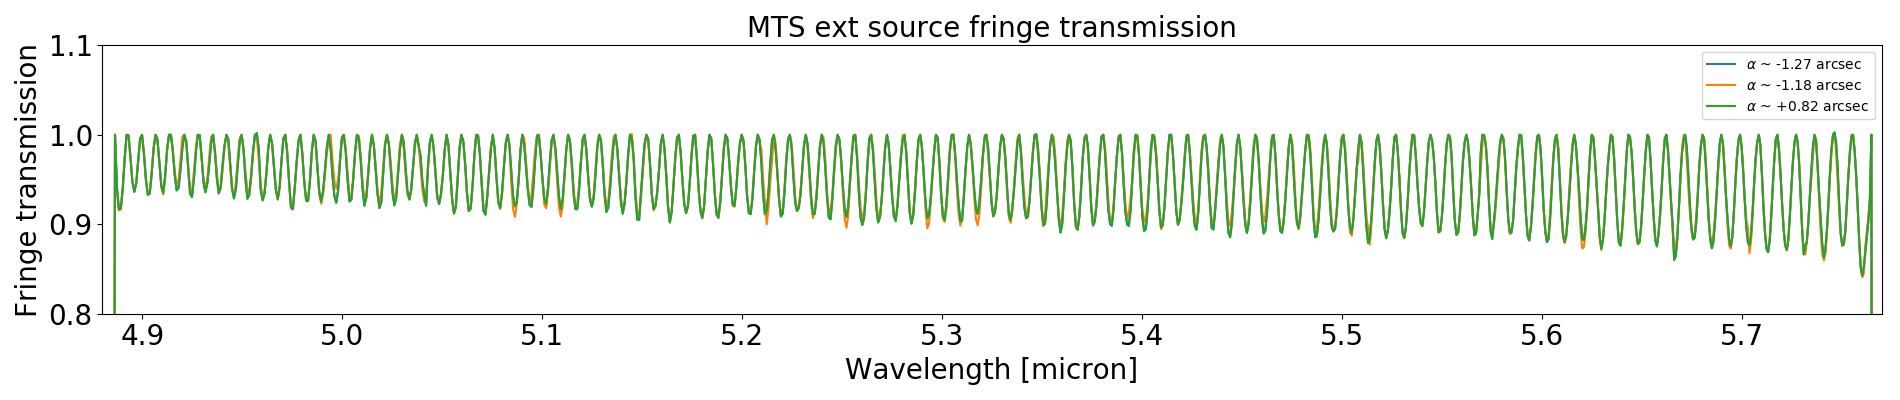

<IPython.core.display.Javascript object>


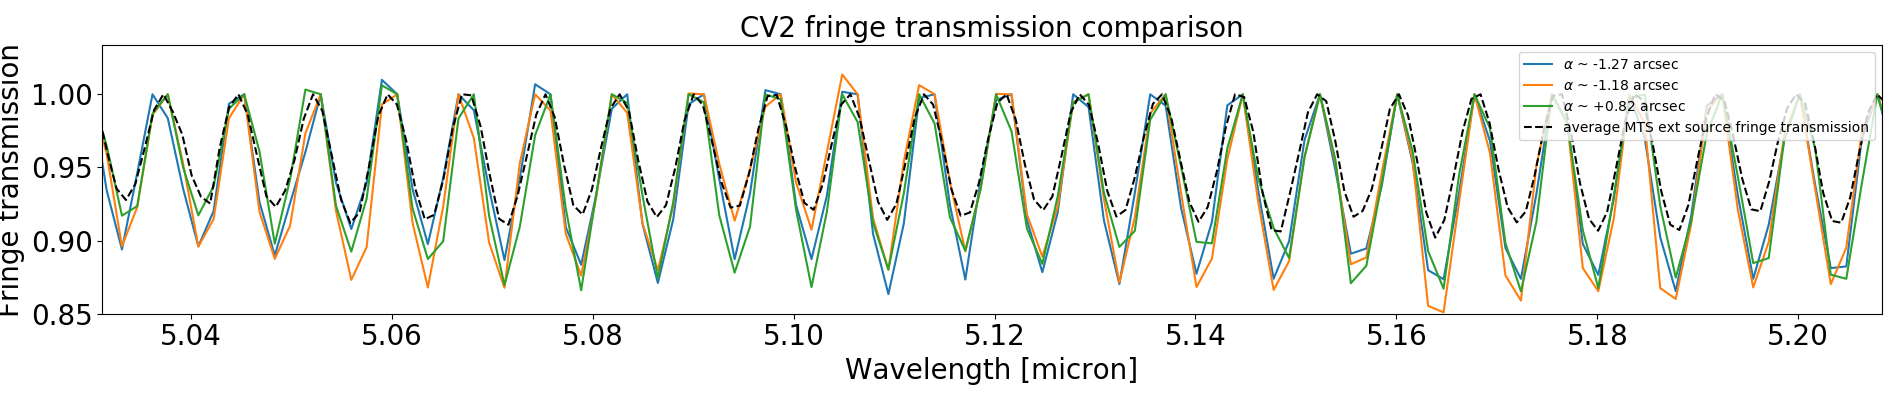

<IPython.core.display.Javascript object>


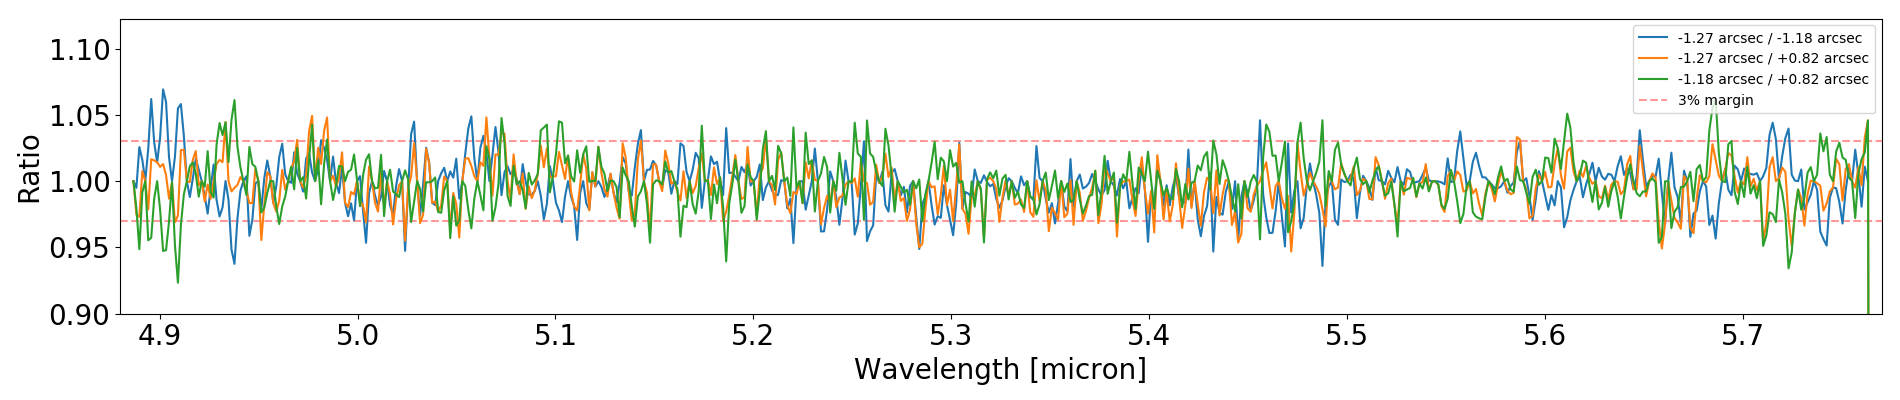

In [17]:
plt.figure(figsize=(19,4))
plt.title('MTS ext source fringe transmission')
plt.plot(lambdaMap[ypos_p1,xpos_p1],ext_source_norm_fringe_p1[0]/ext_source_norm_fringe_p1[2],label=r'$\alpha$ ~ -1.27 arcsec')
plt.plot(lambdaMap[ypos_p2,xpos_p2],ext_source_norm_fringe_p2[0]/ext_source_norm_fringe_p2[2],label=r'$\alpha$ ~ -1.18 arcsec')
plt.plot(lambdaMap[ypos_p7,xpos_p7],ext_source_norm_fringe_p7[0]/ext_source_norm_fringe_p7[2],label=r'$\alpha$ ~ +0.82 arcsec')
plt.xlim(4.88,5.77)
plt.ylim(0.8,1.1)
plt.xlabel('Wavelength [micron]')
plt.ylabel('Fringe transmission')
plt.legend(loc='upper right',fontsize=10)
plt.tight_layout()

plt.figure(figsize=(19,4))
plt.title('CV2 fringe transmission comparison')
plt.plot(lambcens,CV2_P1_norm_fringe[0]/CV2_P1_norm_fringe[2],label=r'$\alpha$ ~ -1.27 arcsec')
plt.plot(lambcens,CV2_P2_norm_fringe[0]/CV2_P2_norm_fringe[2],label=r'$\alpha$ ~ -1.18 arcsec')
plt.plot(lambcens,CV2_P7_norm_fringe[0]/CV2_P7_norm_fringe[2],label=r'$\alpha$ ~ +0.82 arcsec')
plt.plot(lambdaMap_avg,ext_source_norm_fringe_avg,'k',linestyle='dashed',label='average MTS ext source fringe transmission')
plt.xlim(4.88,5.77)
plt.ylim(0.8,1.1)
plt.xlabel('Wavelength [micron]')
plt.ylabel('Fringe transmission')
plt.legend(loc='upper right',fontsize=10)
plt.tight_layout()

plt.figure(figsize=(19,4))
plt.plot(lambcens,(CV2_P1_norm_fringe[0]/CV2_P1_norm_fringe[2])/(CV2_P2_norm_fringe[0]/CV2_P2_norm_fringe[2]),label=r'-1.27 arcsec / -1.18 arcsec')
plt.plot(lambcens,(CV2_P1_norm_fringe[0]/CV2_P1_norm_fringe[2])/(CV2_P7_norm_fringe[0]/CV2_P7_norm_fringe[2]),label=r'-1.27 arcsec / +0.82 arcsec')
plt.plot(lambcens,(CV2_P2_norm_fringe[0]/CV2_P2_norm_fringe[2])/(CV2_P7_norm_fringe[0]/CV2_P7_norm_fringe[2]),label=r'-1.18 arcsec / +0.82 arcsec')
plt.hlines([0.97,1.03],4.88,5.77,'r',alpha=0.4,linestyle='dashed',label='3% margin')
plt.xlim(4.88,5.77)
plt.ylim(0.9)
plt.xlabel('Wavelength [micron]')
plt.ylabel('Ratio')
plt.legend(loc='upper right',fontsize=10)
plt.tight_layout()

### Remarks:
* The fringe "noise" is around 10% at short wavelengths; 15% at long wavelengths.
* The large-scale agreement between the fringe transmissions is still there, however small scale differences are more prominent.
* The fringe transmission at different along-slice positions changes in an erratic manner (i.e. there are no clear trends/periodicities in the residuals). Small pixel-wide shifts in fringe peak positions and small changes in fringe contrast results in peak-to-peak residuals of ~6-7%.

## > Slice-by-slice analysis

In [10]:
print_obs_in_slice(sliceID=1)

FM_MRS_OPT_01: P2, -0.16 arcsec
FM_MRS_OPT_01: P3, 1.07 arcsec
FM_MRS_OPT_01: P1, -1.41 arcsec


<IPython.core.display.Javascript object>


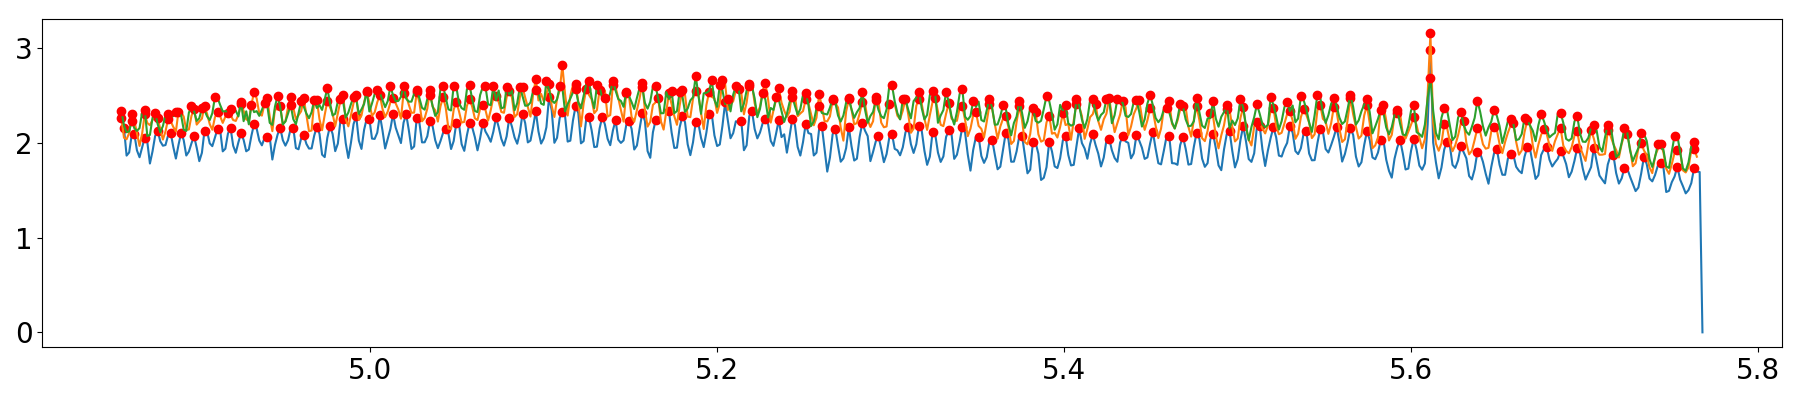

<IPython.core.display.Javascript object>


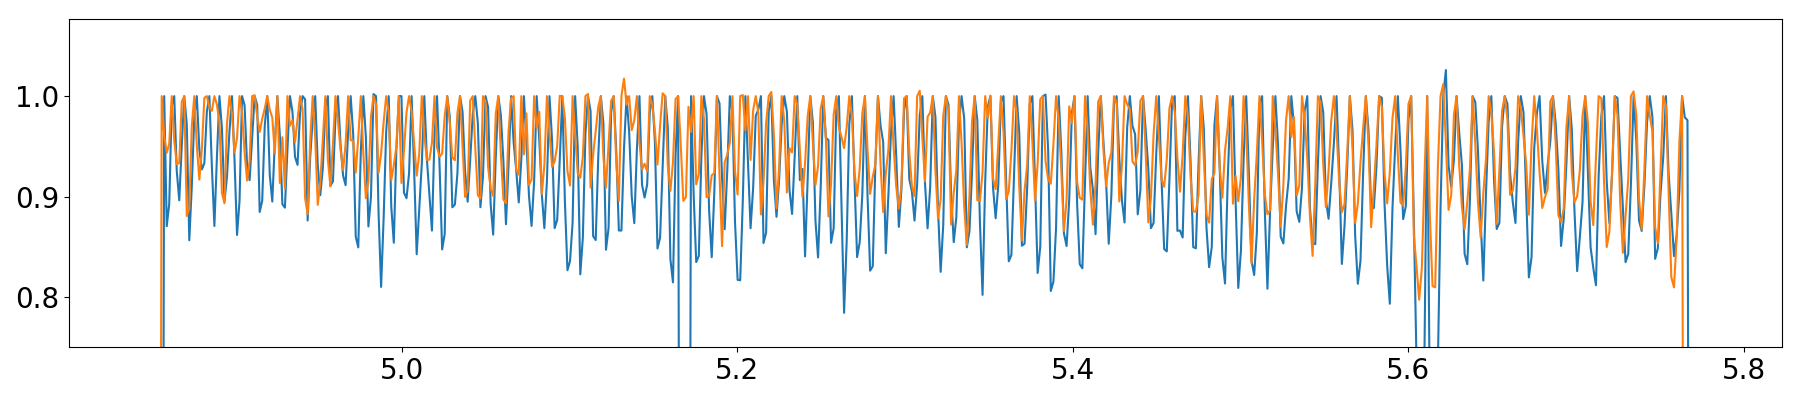

<IPython.core.display.Javascript object>


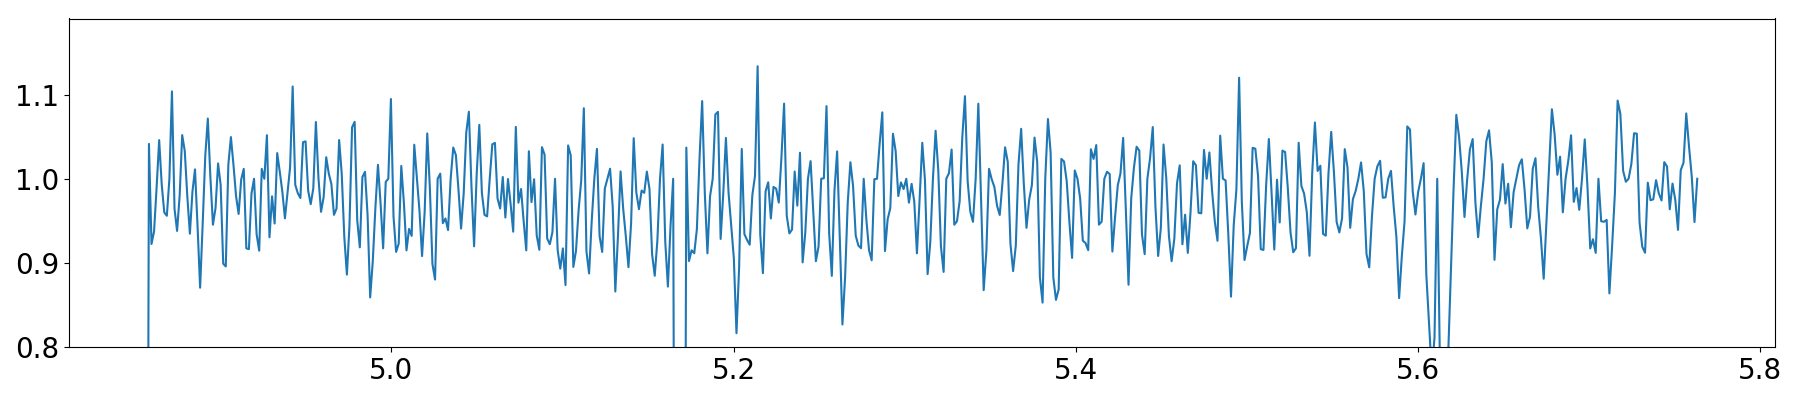

In [13]:
norm_fringe_P1 = funcs.norm_fringe(FM_MRS_OPT_01_raster_centroid['P1'][1],min_dist=2)
norm_fringe_P2 = funcs.norm_fringe(FM_MRS_OPT_01_raster_centroid['P2'][1],min_dist=2)
norm_fringe_P3 = funcs.norm_fringe(FM_MRS_OPT_01_raster_centroid['P3'][1],min_dist=2)

plt.figure(figsize=(18,4))
plt.plot(lambcens,FM_MRS_OPT_01_raster_centroid['P1'][1])
plt.plot(lambcens[norm_fringe_P1[1]],FM_MRS_OPT_01_raster_centroid['P1'][1][norm_fringe_P1[1]],'ro')
plt.plot(lambcens,FM_MRS_OPT_01_raster_centroid['P2'][1])
plt.plot(lambcens[norm_fringe_P2[1]],FM_MRS_OPT_01_raster_centroid['P2'][1][norm_fringe_P2[1]],'ro')
plt.plot(lambcens,FM_MRS_OPT_01_raster_centroid['P3'][1])
plt.plot(lambcens[norm_fringe_P3[1]],FM_MRS_OPT_01_raster_centroid['P3'][1][norm_fringe_P3[1]],'ro')
plt.tight_layout()

plt.figure(figsize=(18,4))
plt.plot(lambcens,norm_fringe_P1[0]/norm_fringe_P1[2])
# plt.plot(lambcens,norm_fringe_P2[0]/norm_fringe_P2[2])
plt.plot(lambcens,norm_fringe_P3[0]/norm_fringe_P3[2])
plt.ylim(0.75)
plt.tight_layout()

plt.figure(figsize=(18,4))
plt.plot(lambcens,(norm_fringe_P1[0]/norm_fringe_P1[2])/(norm_fringe_P3[0]/norm_fringe_P3[2]) )
# plt.plot(lambcens,(norm_fringe_P2[0]/norm_fringe_P2[2]) )
# plt.plot(lambcens,(norm_fringe_P3[0]/norm_fringe_P3[2]) )
plt.ylim(0.8)
plt.tight_layout()

In [32]:
print_obs_in_slice(sliceID=2)

FM_MRS_OPT_01: P6, 1.04 arcsec
FM_MRS_OPT_01: P4, -1.45 arcsec
FM_MRS_OPT_01: P5, -0.2 arcsec


<IPython.core.display.Javascript object>


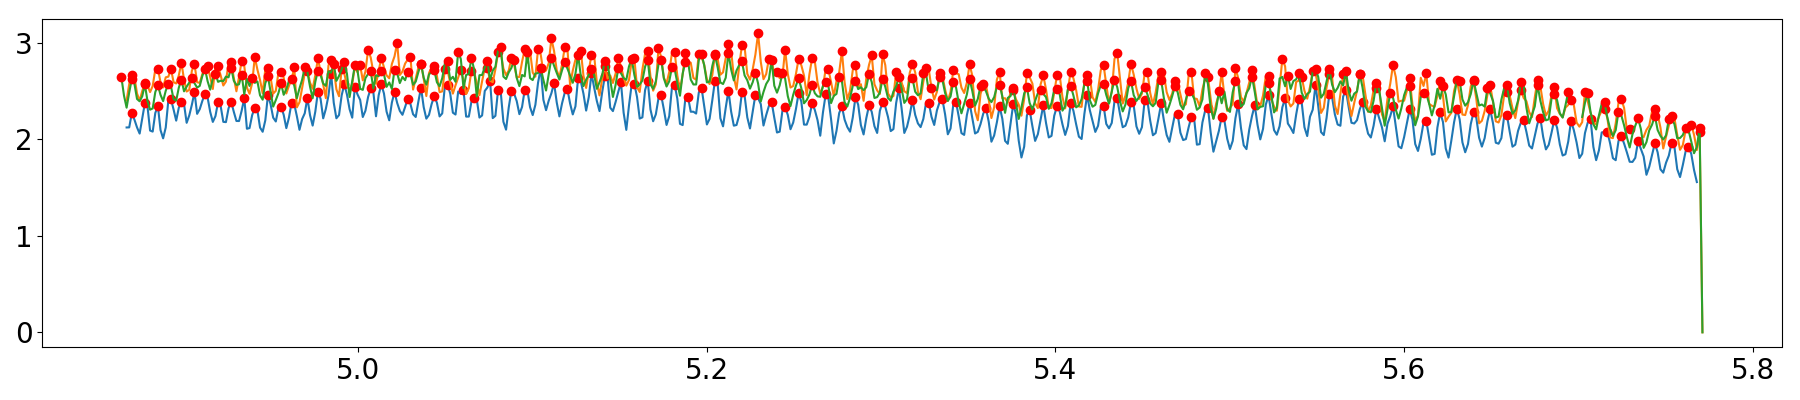

<IPython.core.display.Javascript object>


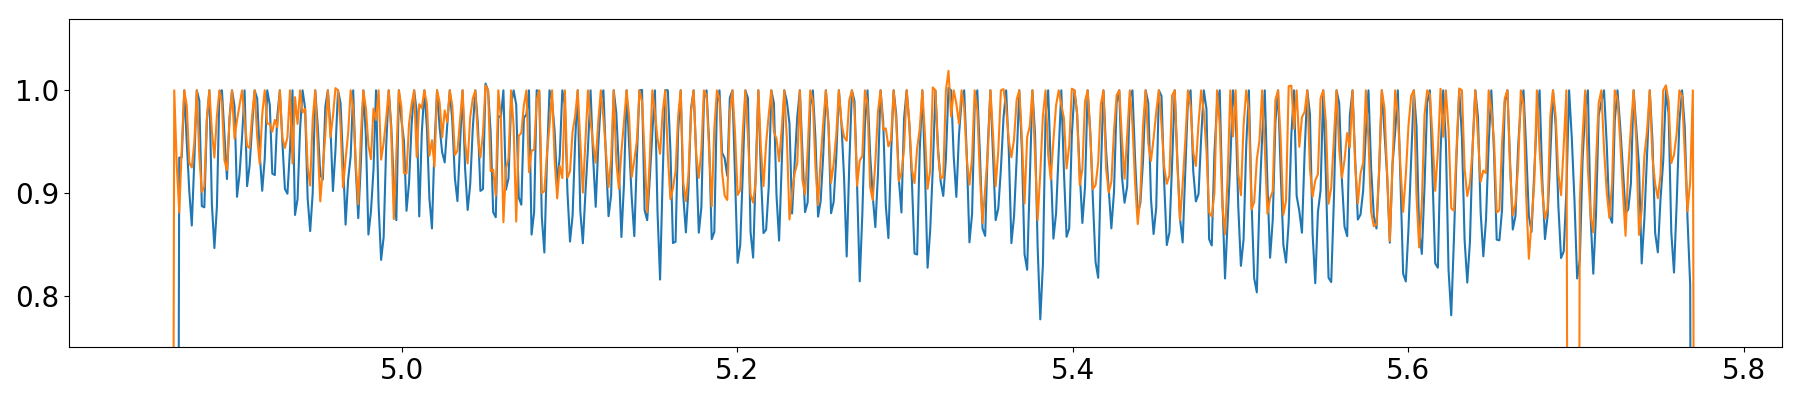

In [17]:
norm_fringe_P4 = funcs.norm_fringe(FM_MRS_OPT_01_raster_centroid['P4'][1],min_dist=2)
norm_fringe_P5 = funcs.norm_fringe(FM_MRS_OPT_01_raster_centroid['P5'][1],min_dist=2)
norm_fringe_P6 = funcs.norm_fringe(FM_MRS_OPT_01_raster_centroid['P6'][1],min_dist=2)

plt.figure(figsize=(18,4))
plt.plot(lambcens,FM_MRS_OPT_01_raster_centroid['P4'][1])
plt.plot(lambcens[norm_fringe_P4[1]],FM_MRS_OPT_01_raster_centroid['P4'][1][norm_fringe_P4[1]],'ro')
plt.plot(lambcens,FM_MRS_OPT_01_raster_centroid['P5'][1])
plt.plot(lambcens[norm_fringe_P5[1]],FM_MRS_OPT_01_raster_centroid['P5'][1][norm_fringe_P5[1]],'ro')
plt.plot(lambcens,FM_MRS_OPT_01_raster_centroid['P6'][1])
plt.plot(lambcens[norm_fringe_P6[1]],FM_MRS_OPT_01_raster_centroid['P6'][1][norm_fringe_P6[1]],'ro')
plt.tight_layout()

plt.figure(figsize=(18,4))
plt.plot(lambcens,norm_fringe_P4[0]/norm_fringe_P4[2])
# plt.plot(lambcens,norm_fringe_P5[0]/norm_fringe_P5[2])
plt.plot(lambcens,norm_fringe_P6[0]/norm_fringe_P6[2])
plt.ylim(0.75)
plt.tight_layout()

<IPython.core.display.Javascript object>


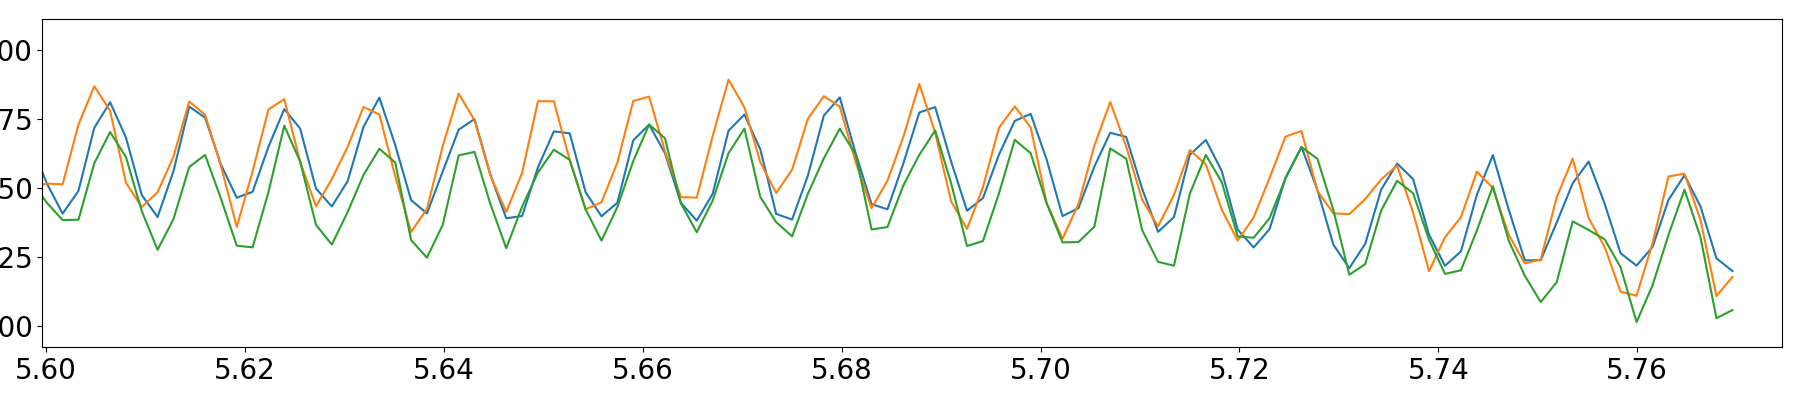

In [28]:
plt.figure(figsize=(18,4))
# point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_point_source_raster(lvl2path,position='middle',pointing='P1')
# point_source_bkgsubtr = point_source_sci-point_source_bkg
# point_source_oddevencorr = funcs.OddEvenRowSignalCorrection(point_source_bkgsubtr)

# pointsource_centroid = funcs.point_source_along_slice_centroiding(point_source_oddevencorr,band,d2cMaps,spec_grid=[lambcens,lambfwhms],offset_slice=0)
plt.plot(lambcens,pointsource_centroid[1])
plt.plot(lambcens,FM_MRS_OPT_01_raster_centroid['P17'][1]*1.2)
plt.plot(lambcens,FM_MRS_OPT_01_raster_centroid['P20'][1])
plt.tight_layout()

## Conclusions:  
* The pixel sampling of the MRS makes it difficult to study point source fringes without some kind of spatial fitting.
* The fringe profile of a point source can be extracted by fitting the PSF with a 1D Gaussian in every spectral bin on the detector and taking the Gaussian peak in every bin.
* Looking at different across-slice positions of a point source, and dividing the fringe profiles, yields periodic residuals of 4%. This can be due to a wavelength offset in across-slice direction, or a transmission difference in the resonator.
* There is a clear disagreement between the point source fringes and the extended source fringes. The disagreement in frequency and/or phase appears to be consistent in different along-slice positions. The disagreement in amplitude however varies in an (as of yet) unpredictable manner.


## Follow-up question:  
In this notebook we only looked at the peak intensity of the point sources (peak of the PSF). How does the fringe transmission change at different locations on the PSF (if at all)?